In [1]:
import numpy as np
import scipy as sp
import findiff as fd
import matplotlib.pyplot as plt
from skimage import measure
from skimage import filters

In [2]:
Width  = 2000
Height = 2000
Xmin = -2.0; Xmax = 2.0
Ymin = -2.0; Ymax = 2.0

X = np.linspace(Xmin,Xmax,Width)
Y = np.linspace(Ymin,Ymax,Height)

dx = X[1]-X[0]
dy = Y[1]-Y[0]

Xv,Yv = np.meshgrid(X,Y,indexing="ij")

d_dx = fd.FinDiff(0,dx,1,acc = 2)
d_dy = fd.FinDiff(1,dy,1,acc = 2)

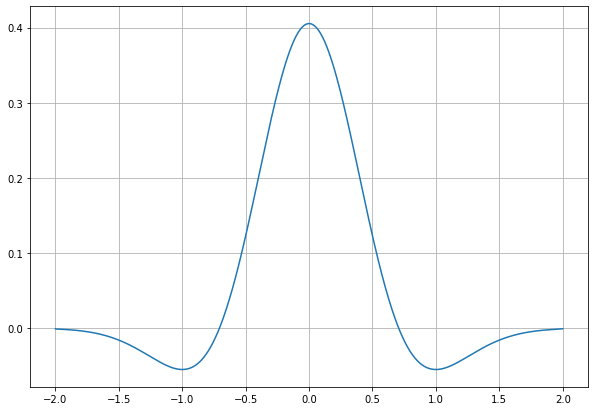

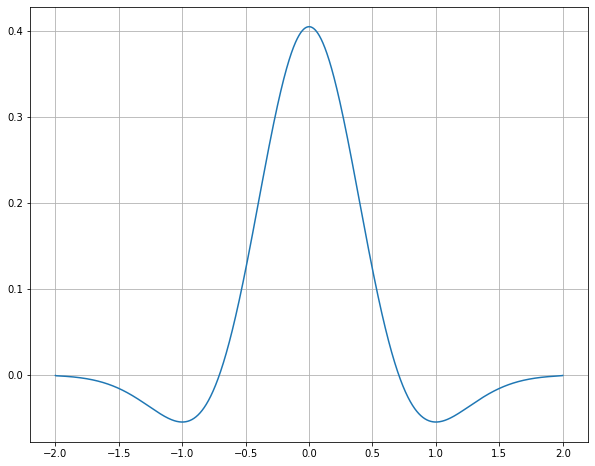

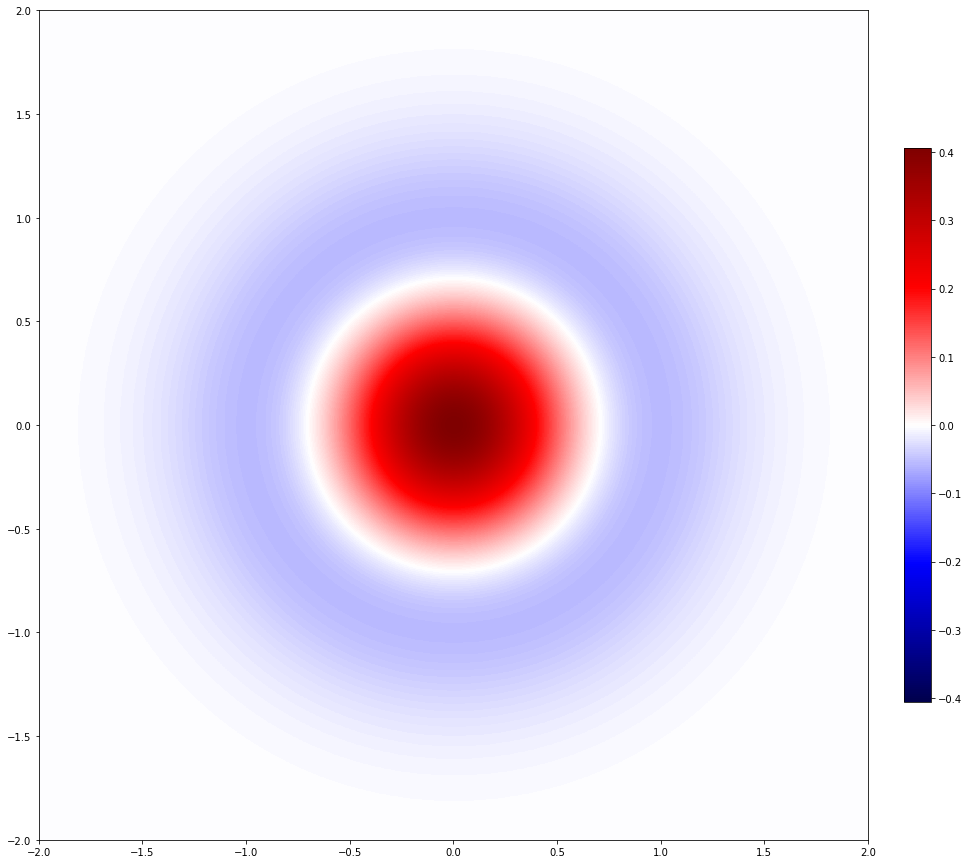

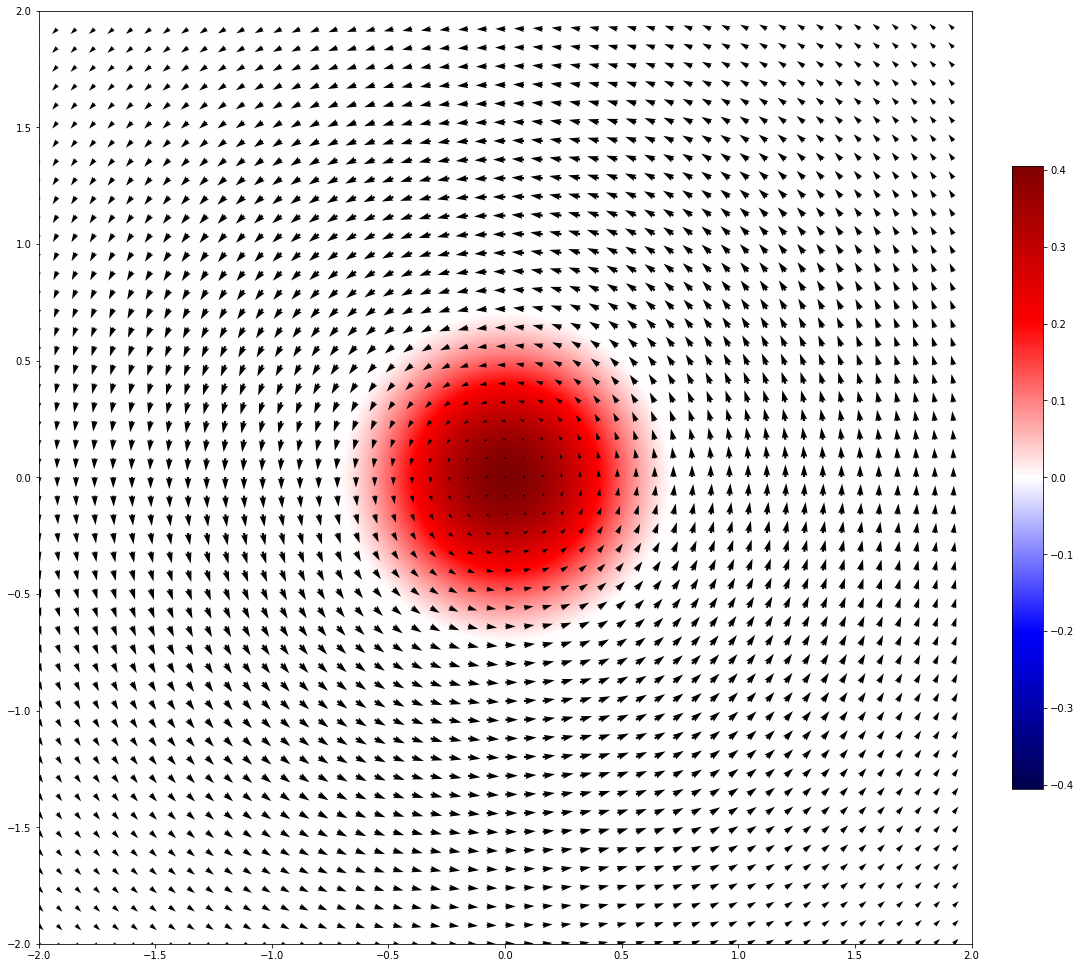

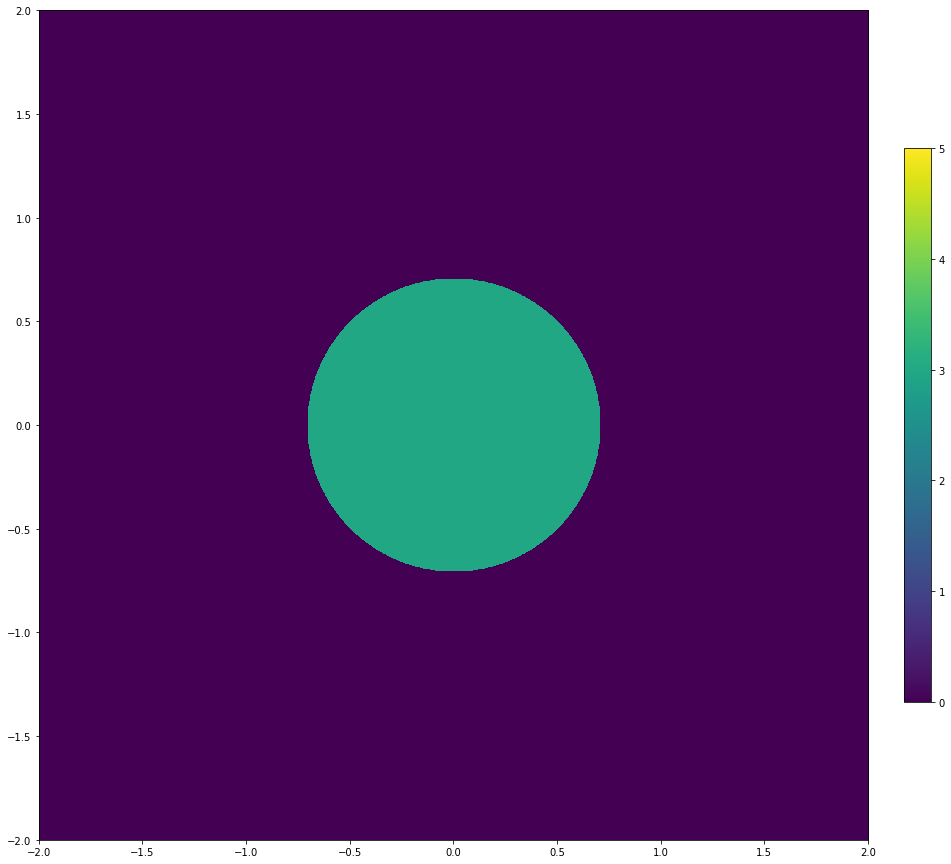

[0 1 2 3 4 5]
3: G,rc,xc,yc = 0.99996,1,-1.086e-16,-1.146e-16


In [3]:
Width  = 2000
Height = 2000
Xmin = -2.0; Xmax = 2.0
Ymin = -2.0; Ymax = 2.0

X = np.linspace(Xmin,Xmax,Width)
Y = np.linspace(Ymin,Ymax,Height)

dx = X[1]-X[0]
dy = Y[1]-Y[0]

d_dx = fd.FinDiff(0,dx,1,acc = 2)
d_dy = fd.FinDiff(1,dy,1,acc = 2)

Xv,Yv = np.meshgrid(X,Y,indexing="ij")

##############################################

x0 = 0.0; y0 = 0.0

Gamma = 1.0
rc = 1.0
rc2 = rc**2

u = np.zeros(Xv.shape)
v = np.zeros(Yv.shape)

r2 = (Xv-x0)**2 + (Yv-y0)**2
Fr  = (Gamma/(2*np.pi*r2))*(1-np.exp(-r2/rc2))
u  += - (Yv-y0) * Fr
v  +=   (Xv-x0) * Fr

##############################################

ux = d_dx(u); uy = d_dy(u)
vx = d_dx(v); vy = d_dy(v)

detDu = ux*vy - uy*vx
lamb  = detDu 

##############################################

ux = d_dx(u); uy = d_dy(u)
vx = d_dx(v); vy = d_dy(v)

uxxx = d_dx(d_dx(d_dx(u)))
uxxy = d_dx(d_dx(d_dy(u)))
uxyy = d_dx(d_dy(d_dy(u)))
uyyy = d_dy(d_dy(d_dy(u)))

vxxx = d_dx(d_dx(d_dx(v)))
vxxy = d_dx(d_dx(d_dy(v)))
vxyy = d_dx(d_dy(d_dy(v)))
vyyy = d_dy(d_dy(d_dy(v)))

omega = vx-uy
omega_tilde = uxxy + uyyy - vxxx - vxyy
lamb_tilde  = (uyyy-vxyy)*(uxxy - vxxx) - (uxyy-vxxy)**2

##############################################

fig = plt.figure(figsize = (10,7))
plt.plot(X,lamb_tilde[:,Height//2])
plt.grid()
plt.show()

##############################################

fig = plt.figure(figsize = (10,8))
plt.plot(Y,lamb_tilde[Width//2,:])
plt.grid()
plt.show()

##############################################

fig = plt.figure(figsize=(16,16*((Ymax-Ymin)/(Xmax-Xmin))))
cbar = plt.imshow(lamb_tilde.T,extent=(Xmin,Xmax,Ymin,Ymax),
                               origin='lower', cmap='seismic',aspect='equal',
                               vmin = -np.max(lamb_tilde),vmax = np.max(lamb_tilde))
fig.colorbar(cbar,fraction=0.031, pad=0.04)

##############################################

heave = np.zeros(omega_tilde.shape)
heave[omega*omega_tilde > 0.0] = 1.0

lamb_tilde[lamb_tilde<0.0] = 0.0
lamb_tilde = lamb_tilde * heave

fig = plt.figure(figsize=(18,18*((Ymax-Ymin)/(Xmax-Xmin))))

skip = 40
plt.quiver(Xv[::skip,::skip],Yv[::skip,::skip],u[::skip,::skip],v[::skip,::skip],scale = 7.5)

cbar = plt.imshow(lamb_tilde.T,extent=(Xmin,Xmax,Ymin,Ymax),
                               origin='lower', cmap='seismic',aspect='equal',
                               vmin = -np.max(lamb_tilde),vmax = np.max(lamb_tilde))
fig.colorbar(cbar,fraction=0.031, pad=0.04)

###############################################

blobs = measure.label(lamb_tilde.T>0.0,background=0)

fig = plt.figure(figsize=(16,16))

cbar = plt.imshow(blobs,extent=(Xmin,Xmax,Ymin,Ymax),origin='lower')
fig.colorbar(cbar,fraction=0.031, pad=0.04)

plt.show()

###############################################

blobs = measure.label(lamb_tilde>0.0,background=0)
print(np.unique(blobs))

for k in np.unique(blobs)[1:]:
    chi = np.zeros(lamb.shape)
    chi[blobs == k] = 1
    
    ###############################################
    # scipy.integrate.simps(y, x=None, dx=1, axis=- 1, even='avg')
    if np.mean(chi) < 1.e-3:
        continue
    
    area     = sp.integrate.simps(sp.integrate.simps(chi,X,axis = 0),Y,axis=0)
    intOmega = sp.integrate.simps(sp.integrate.simps(chi*omega,X,axis = 0),Y,axis=0)
    Xw       = sp.integrate.simps(sp.integrate.simps(chi*omega*Xv,X,axis = 0),Y,axis=0)
    Yw       = sp.integrate.simps(sp.integrate.simps(chi*omega*Yv,X,axis = 0),Y,axis=0)
    
    rc = np.sqrt(area/np.pi)*np.sqrt(2.)
    G  = 2.541494083*intOmega
    xc = Xw/intOmega
    yc = Yw/intOmega
    
    print("{4}: G,rc,xc,yc = {0:.5g},{1:.4g},{2:.4g},{3:.4g}".format(G,rc,xc,yc,k))

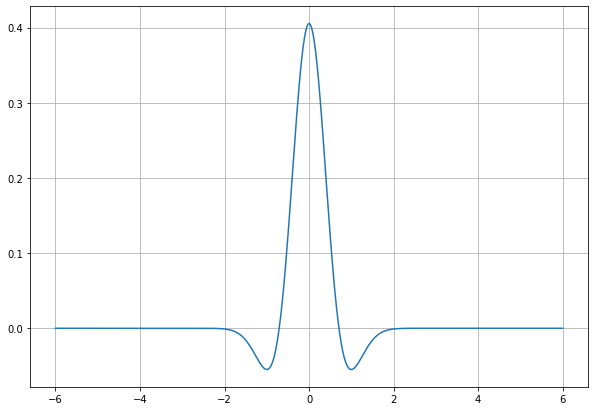

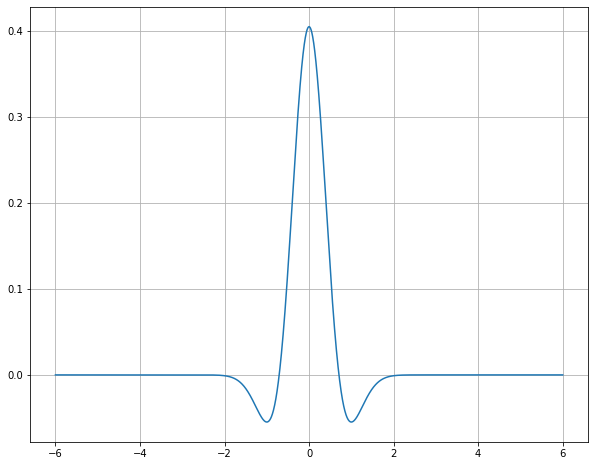

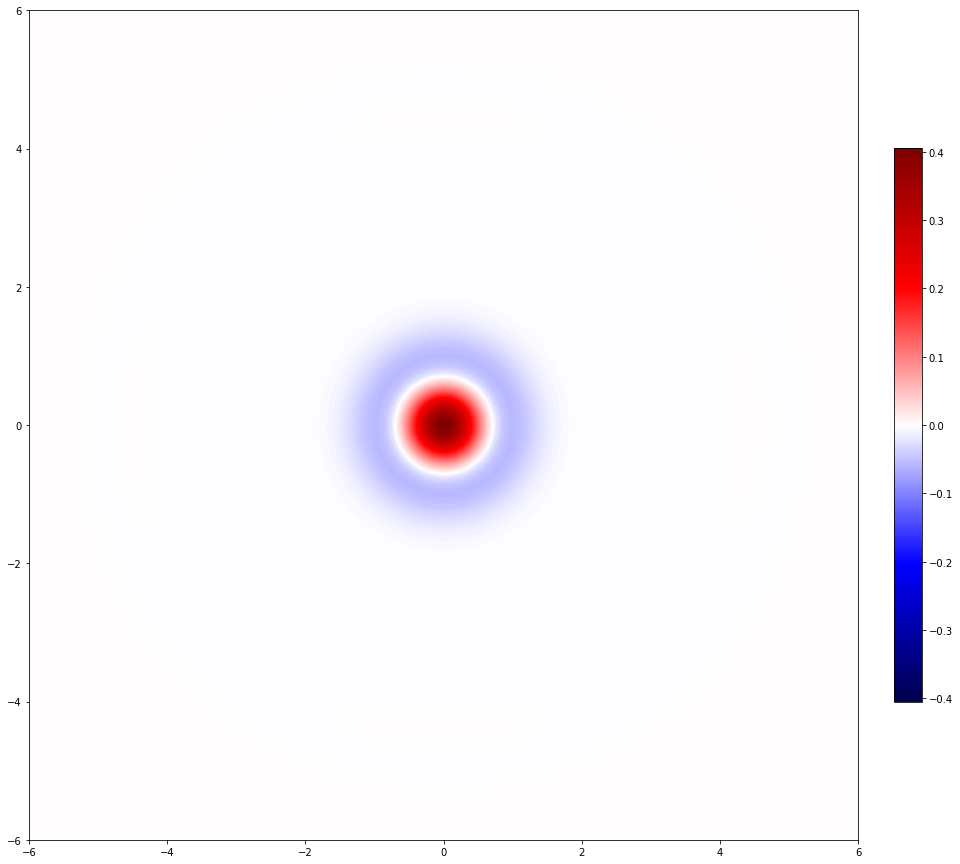

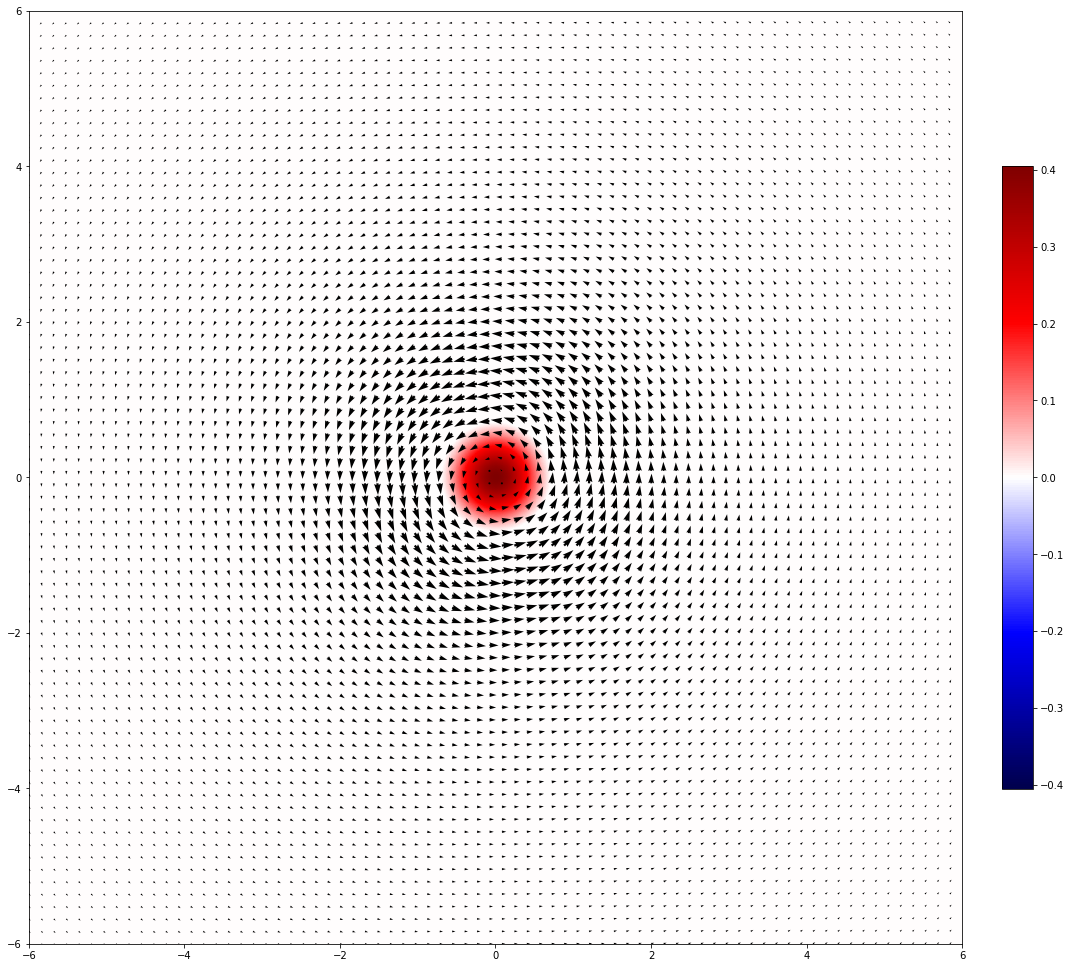

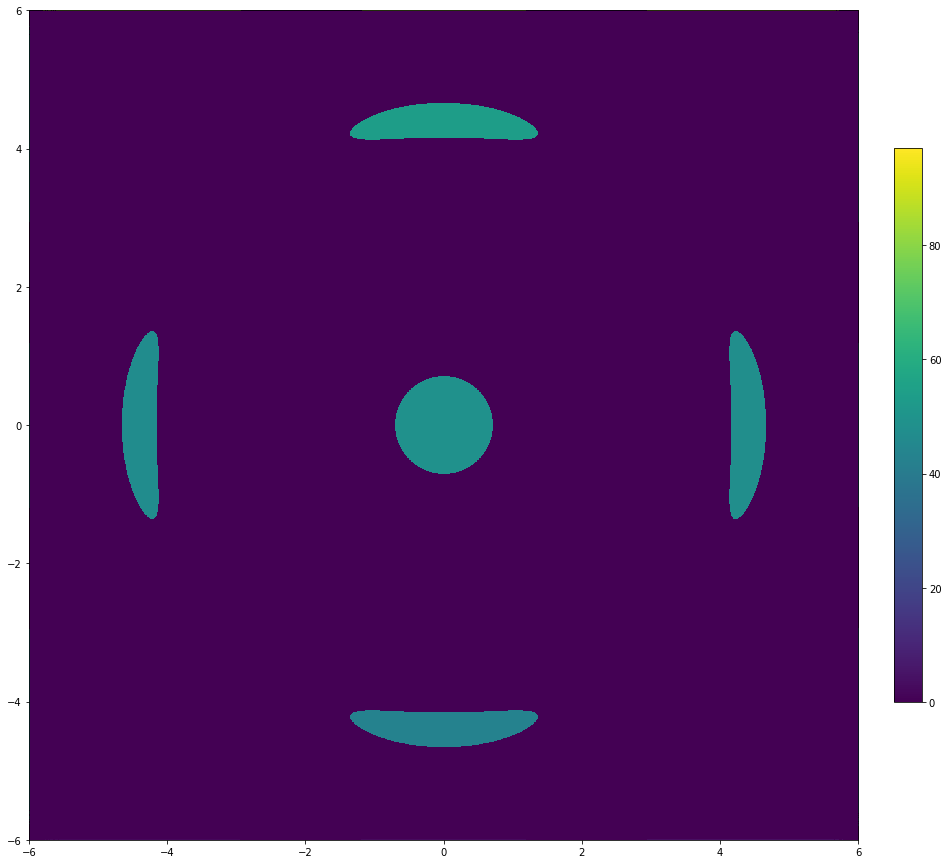

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97]
43: G,rc,xc,yc = -2.5578e-08,0.8377,-4.379,-8.726e-05
47: G,rc,xc,yc = -2.5578e-08,0.8377,-8.726e-05,-4.379
48: G,rc,xc,yc = -2.5588e-08,0.8379,-6.24e-05,4.379
49: G,rc,xc,yc = 0.99998,1,2.026e-16,2.204e-16
54: G,rc,xc,yc = -2.5588e-08,0.8379,4.379,-6.24e-05


In [4]:
Width  = 3000
Height = 3000
Xmin = -6.0; Xmax = 6.0
Ymin = -6.0; Ymax = 6.0

X = np.linspace(Xmin,Xmax,Width)
Y = np.linspace(Ymin,Ymax,Height)

dx = X[1]-X[0]
dy = Y[1]-Y[0]

d_dx = fd.FinDiff(0,dx,1,acc = 2)
d_dy = fd.FinDiff(1,dy,1,acc = 2)

Xv,Yv = np.meshgrid(X,Y,indexing="ij")

##############################################

x0 = 0.0; y0 = 0.0

Gamma = 1.0
rc = 1.0
rc2 = rc**2

u = np.zeros(Xv.shape)
v = np.zeros(Yv.shape)

r2 = (Xv-x0)**2 + (Yv-y0)**2
Fr  = (Gamma/(2*np.pi*r2))*(1-np.exp(-r2/rc2))
u  += - (Yv-y0) * Fr
v  +=   (Xv-x0) * Fr

##############################################

ux = d_dx(u); uy = d_dy(u)
vx = d_dx(v); vy = d_dy(v)

detDu = ux*vy - uy*vx
lamb  = detDu 

##############################################

ux = d_dx(u); uy = d_dy(u)
vx = d_dx(v); vy = d_dy(v)

uxxx = d_dx(d_dx(d_dx(u)))
uxxy = d_dx(d_dx(d_dy(u)))
uxyy = d_dx(d_dy(d_dy(u)))
uyyy = d_dy(d_dy(d_dy(u)))

vxxx = d_dx(d_dx(d_dx(v)))
vxxy = d_dx(d_dx(d_dy(v)))
vxyy = d_dx(d_dy(d_dy(v)))
vyyy = d_dy(d_dy(d_dy(v)))

omega = vx-uy
omega_tilde = uxxy + uyyy - vxxx - vxyy
lamb_tilde  = (uyyy-vxyy)*(uxxy - vxxx) - (uxyy-vxxy)**2

##############################################

fig = plt.figure(figsize = (10,7))
plt.plot(X,lamb_tilde[:,Height//2])
plt.grid()
plt.show()

##############################################

fig = plt.figure(figsize = (10,8))
plt.plot(Y,lamb_tilde[Width//2,:])
plt.grid()
plt.show()

##############################################

fig = plt.figure(figsize=(16,16*((Ymax-Ymin)/(Xmax-Xmin))))
cbar = plt.imshow(lamb_tilde.T,extent=(Xmin,Xmax,Ymin,Ymax),
                               origin='lower', cmap='seismic',aspect='equal',
                               vmin = -np.max(lamb_tilde),vmax = np.max(lamb_tilde))
fig.colorbar(cbar,fraction=0.031, pad=0.04)

##############################################

heave = np.zeros(omega_tilde.shape)
heave[omega*omega_tilde > 0.0] = 1.0

lamb_tilde[lamb_tilde<0.0] = 0.0
lamb_tilde = lamb_tilde * heave

fig = plt.figure(figsize=(18,18*((Ymax-Ymin)/(Xmax-Xmin))))

skip = 40
plt.quiver(Xv[::skip,::skip],Yv[::skip,::skip],u[::skip,::skip],v[::skip,::skip],scale = 7.5)

cbar = plt.imshow(lamb_tilde.T,extent=(Xmin,Xmax,Ymin,Ymax),
                               origin='lower', cmap='seismic',aspect='equal',
                               vmin = -np.max(lamb_tilde),vmax = np.max(lamb_tilde))
fig.colorbar(cbar,fraction=0.031, pad=0.04)

###############################################

blobs = measure.label(lamb_tilde.T>0.0,background=0)

fig = plt.figure(figsize=(16,16))

cbar = plt.imshow(blobs,extent=(Xmin,Xmax,Ymin,Ymax),origin='lower')
fig.colorbar(cbar,fraction=0.031, pad=0.04)

plt.show()

###############################################

blobs = measure.label(lamb_tilde>0.0,background=0)
print(np.unique(blobs))

for k in np.unique(blobs)[1:]:
    chi = np.zeros(lamb.shape)
    chi[blobs == k] = 1
    
    ###############################################
    # scipy.integrate.simps(y, x=None, dx=1, axis=- 1, even='avg')
    if np.mean(chi) < 1.e-3:
        continue
    
    area     = sp.integrate.simps(sp.integrate.simps(chi,X,axis = 0),Y,axis=0)
    intOmega = sp.integrate.simps(sp.integrate.simps(chi*omega,X,axis = 0),Y,axis=0)
    Xw       = sp.integrate.simps(sp.integrate.simps(chi*omega*Xv,X,axis = 0),Y,axis=0)
    Yw       = sp.integrate.simps(sp.integrate.simps(chi*omega*Yv,X,axis = 0),Y,axis=0)
    
    rc = np.sqrt(area/np.pi)*np.sqrt(2.)
    G  = 2.541494083*intOmega
    xc = Xw/intOmega
    yc = Yw/intOmega
    
    print("{4}: G,rc,xc,yc = {0:.5g},{1:.4g},{2:.4g},{3:.4g}".format(G,rc,xc,yc,k))

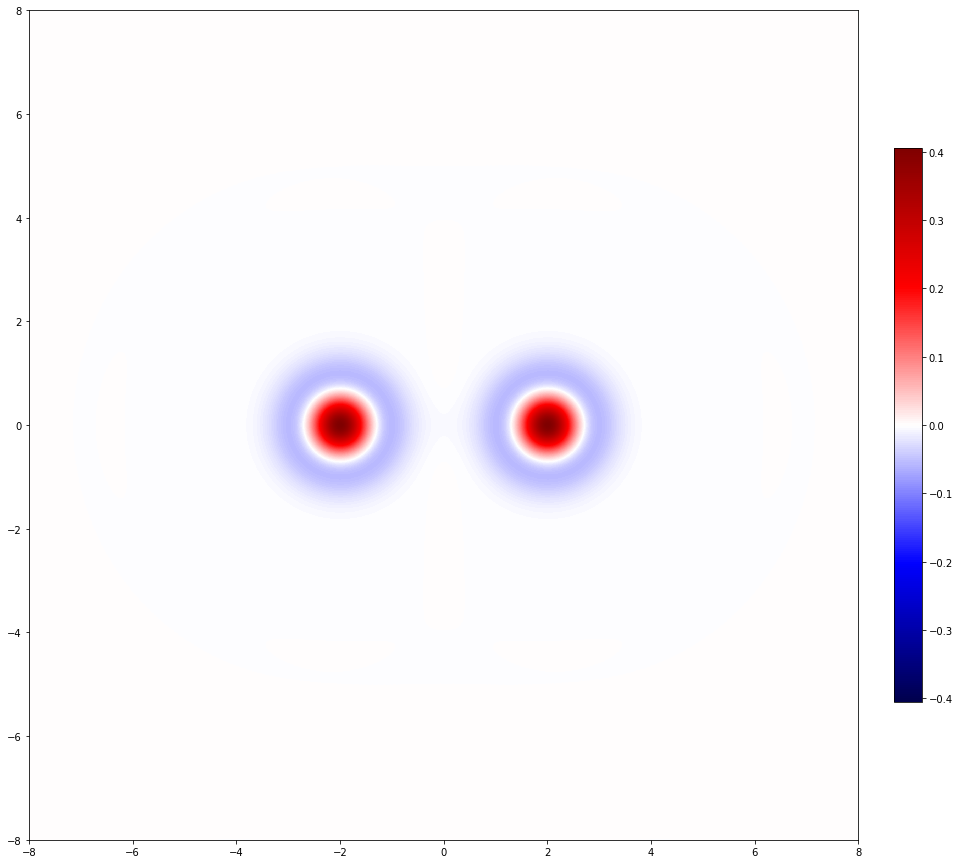

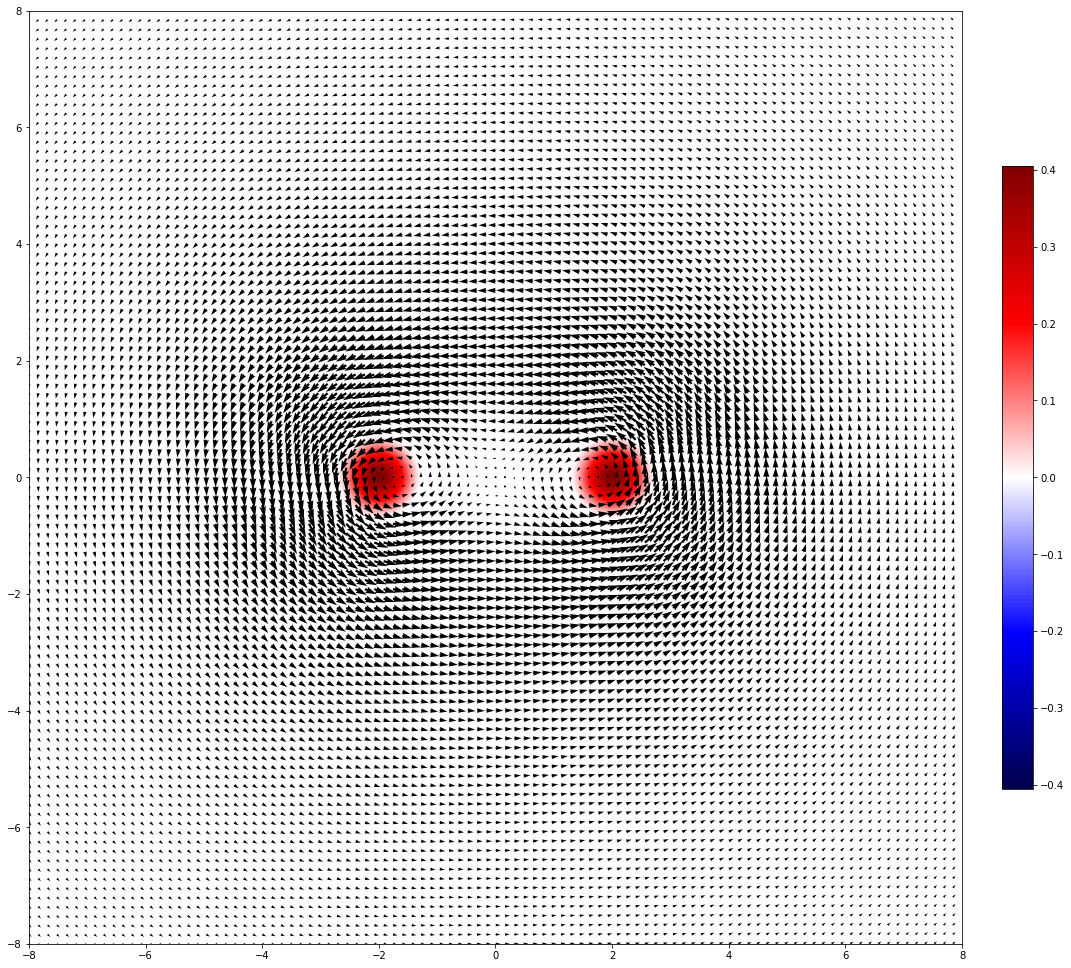

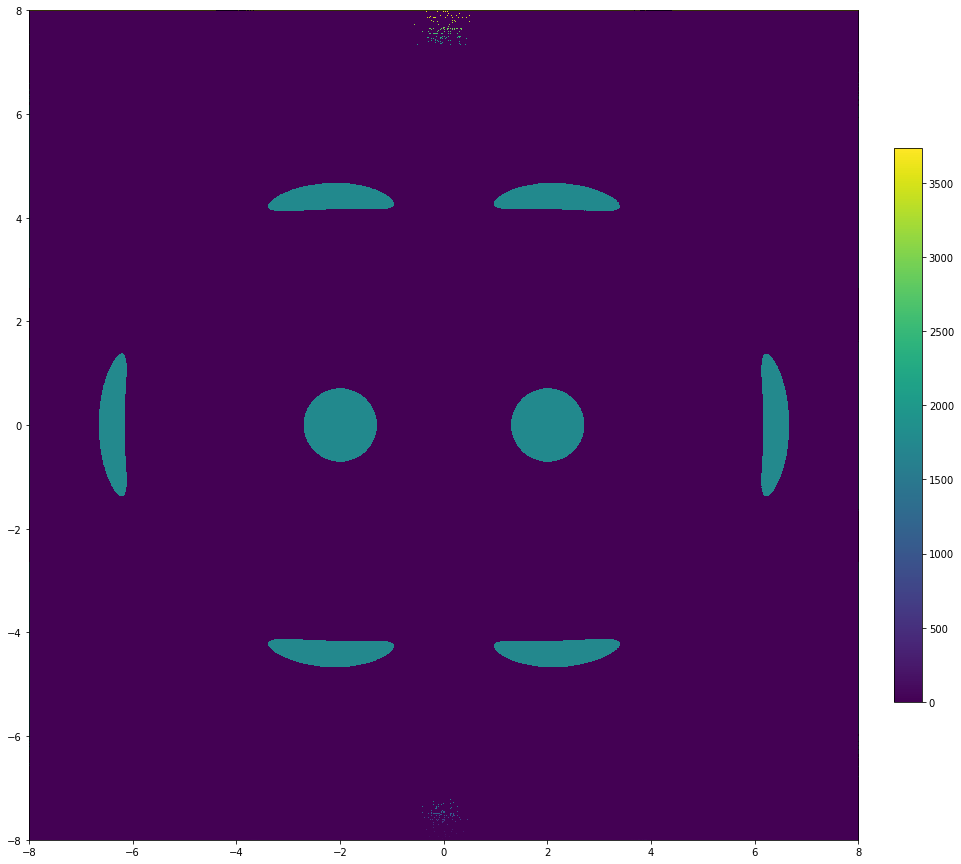

[   0    1    2 ... 3732 3733 3734]
74: G,rc,xc,yc = -2.8421e-08,0.8427,-6.374,7.473e-06
119: G,rc,xc,yc = -1.4558e-08,0.7969,-2.157,-4.399
120: G,rc,xc,yc = -1.4559e-08,0.797,-2.157,4.399
123: G,rc,xc,yc = 1,1,-2,6.525e-16
3614: G,rc,xc,yc = -1.4562e-08,0.7972,2.157,4.399
3615: G,rc,xc,yc = -1.4562e-08,0.7971,2.157,-4.399
3617: G,rc,xc,yc = 1,1,2,6.701e-16
3659: G,rc,xc,yc = -2.8423e-08,0.8427,6.374,-6.693e-05


In [5]:
Width  = 4000
Height = 4000
Xmin = -8.0; Xmax = 8.0
Ymin = -8.0; Ymax = 8.0

X = np.linspace(Xmin,Xmax,Width)
Y = np.linspace(Ymin,Ymax,Height)

dx = X[1]-X[0]
dy = Y[1]-Y[0]

d_dx = fd.FinDiff(0,dx,1,acc = 2)
d_dy = fd.FinDiff(1,dy,1,acc = 2)

Xv,Yv = np.meshgrid(X,Y,indexing="ij")

##############################################

x0,y0 = -2.0,0.0
x1,y1 =  2.0,0.0

Gamma0 = 1.0
Gamma1 = 1.0

Gamma = 1.0
rc = 1.0
rc2 = rc**2

u = np.zeros(Xv.shape)
v = np.zeros(Yv.shape)

r2 = (Xv-x0)**2 + (Yv-y0)**2
Fr = (Gamma0/(2*np.pi*r2))*(1-np.exp(-r2/rc2))
u += (- (Yv-y0) * Fr)
v +=    (Xv-x0) * Fr

r2 = (Xv-x1)**2 + (Yv-y1)**2
Fr = (Gamma1/(2*np.pi*r2))*(1-np.exp(-r2/rc2))
u += (- (Yv-y1) * Fr)
v +=    (Xv-x1) * Fr

##############################################

ux = d_dx(u); uy = d_dy(u)
vx = d_dx(v); vy = d_dy(v)

detDu = ux*vy - uy*vx
lamb  = detDu 

##############################################

ux = d_dx(u); uy = d_dy(u)
vx = d_dx(v); vy = d_dy(v)

uxxx = d_dx(d_dx(d_dx(u)))
uxxy = d_dx(d_dx(d_dy(u)))
uxyy = d_dx(d_dy(d_dy(u)))
uyyy = d_dy(d_dy(d_dy(u)))

vxxx = d_dx(d_dx(d_dx(v)))
vxxy = d_dx(d_dx(d_dy(v)))
vxyy = d_dx(d_dy(d_dy(v)))
vyyy = d_dy(d_dy(d_dy(v)))

omega = vx-uy
omega_tilde = uxxy + uyyy - vxxx - vxyy
lamb_tilde  = (uyyy-vxyy)*(uxxy - vxxx) - (uxyy-vxxy)**2

##############################################

fig = plt.figure(figsize=(16,16*((Ymax-Ymin)/(Xmax-Xmin))))
cbar = plt.imshow(lamb_tilde.T,extent=(Xmin,Xmax,Ymin,Ymax),
                               origin='lower', cmap='seismic',aspect='equal',
                               vmin = -np.max(lamb_tilde),vmax = np.max(lamb_tilde))
fig.colorbar(cbar,fraction=0.031, pad=0.04)

##############################################

heave = np.zeros(omega_tilde.shape)
heave[omega*omega_tilde > 0.0] = 1.0

lamb_tilde[lamb_tilde<0.0] = 0.0
lamb_tilde = lamb_tilde * heave

fig = plt.figure(figsize=(18,18*((Ymax-Ymin)/(Xmax-Xmin))))

skip = 40
plt.quiver(Xv[::skip,::skip],Yv[::skip,::skip],u[::skip,::skip],v[::skip,::skip],scale = 7.5)

cbar = plt.imshow(lamb_tilde.T,extent=(Xmin,Xmax,Ymin,Ymax),
                               origin='lower', cmap='seismic',aspect='equal',
                               vmin = -np.max(lamb_tilde),vmax = np.max(lamb_tilde))
fig.colorbar(cbar,fraction=0.031, pad=0.04)

###############################################

blobs = measure.label(lamb_tilde.T>0.0,background=0)

fig = plt.figure(figsize=(16,16))

cbar = plt.imshow(blobs,extent=(Xmin,Xmax,Ymin,Ymax),origin='lower')
fig.colorbar(cbar,fraction=0.031, pad=0.04)

plt.show()

###############################################

blobs = measure.label(lamb_tilde>0.0,background=0)
print(np.unique(blobs))

for k in np.unique(blobs)[1:]:
    chi = np.zeros(lamb.shape)
    chi[blobs == k] = 1
    
    ###############################################
    # scipy.integrate.simps(y, x=None, dx=1, axis=- 1, even='avg')
    if np.mean(chi) < 1.e-3:
        continue
    
    area     = sp.integrate.simps(sp.integrate.simps(chi,X,axis = 0),Y,axis=0)
    intOmega = sp.integrate.simps(sp.integrate.simps(chi*omega,X,axis = 0),Y,axis=0)
    Xw       = sp.integrate.simps(sp.integrate.simps(chi*omega*Xv,X,axis = 0),Y,axis=0)
    Yw       = sp.integrate.simps(sp.integrate.simps(chi*omega*Yv,X,axis = 0),Y,axis=0)
    
    rc = np.sqrt(area/np.pi)*np.sqrt(2.)
    G  = 2.541494083*intOmega
    xc = Xw/intOmega
    yc = Yw/intOmega
    
    print("{4}: G,rc,xc,yc = {0:.5g},{1:.4g},{2:.4g},{3:.4g}".format(G,rc,xc,yc,k))

In [6]:
Width  = 3000
Height = 3000
Xmin = -6.0; Xmax = 6.0
Ymin = -6.0; Ymax = 6.0

X = np.linspace(Xmin,Xmax,Width)
Y = np.linspace(Ymin,Ymax,Height)

dx = X[1]-X[0]
dy = Y[1]-Y[0]

d_dx = fd.FinDiff(0,dx,1,acc = 2)
d_dy = fd.FinDiff(1,dy,1,acc = 2)

Xv,Yv = np.meshgrid(X,Y,indexing="ij")

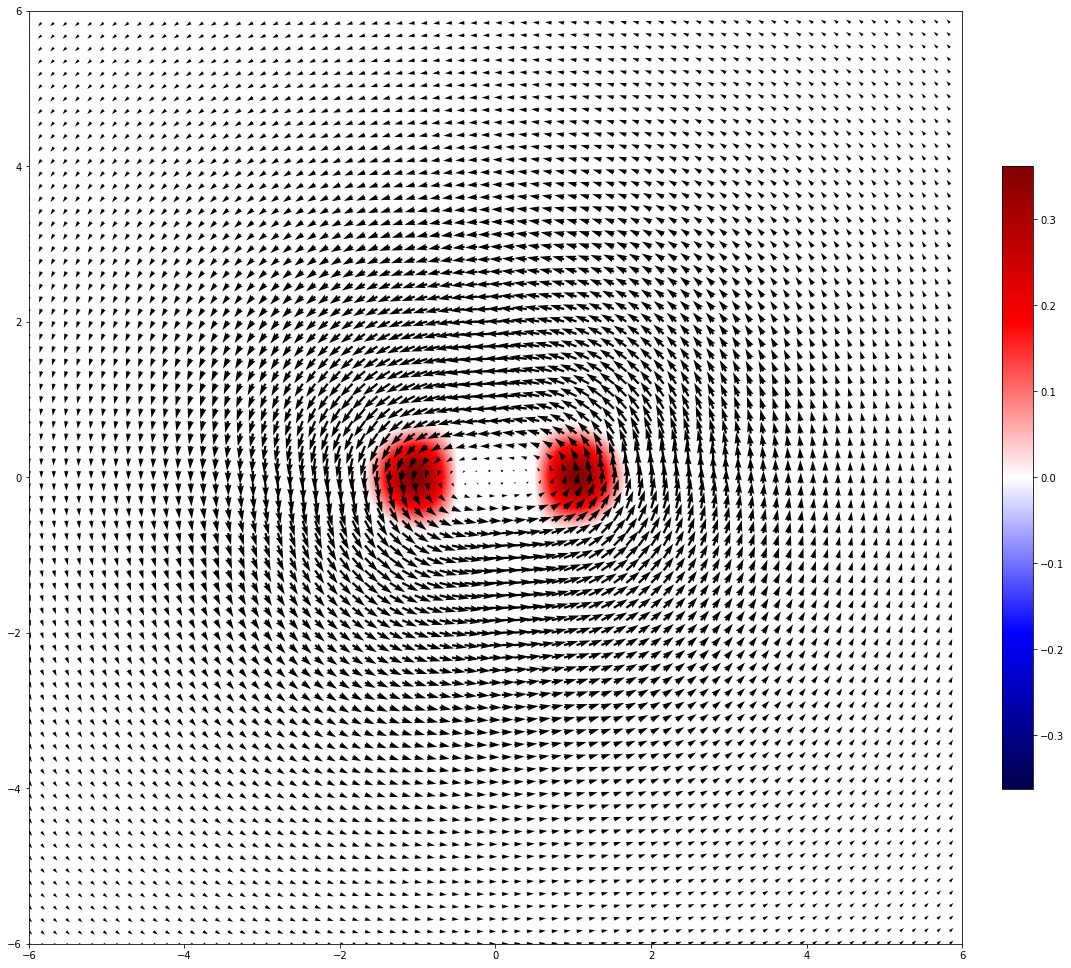

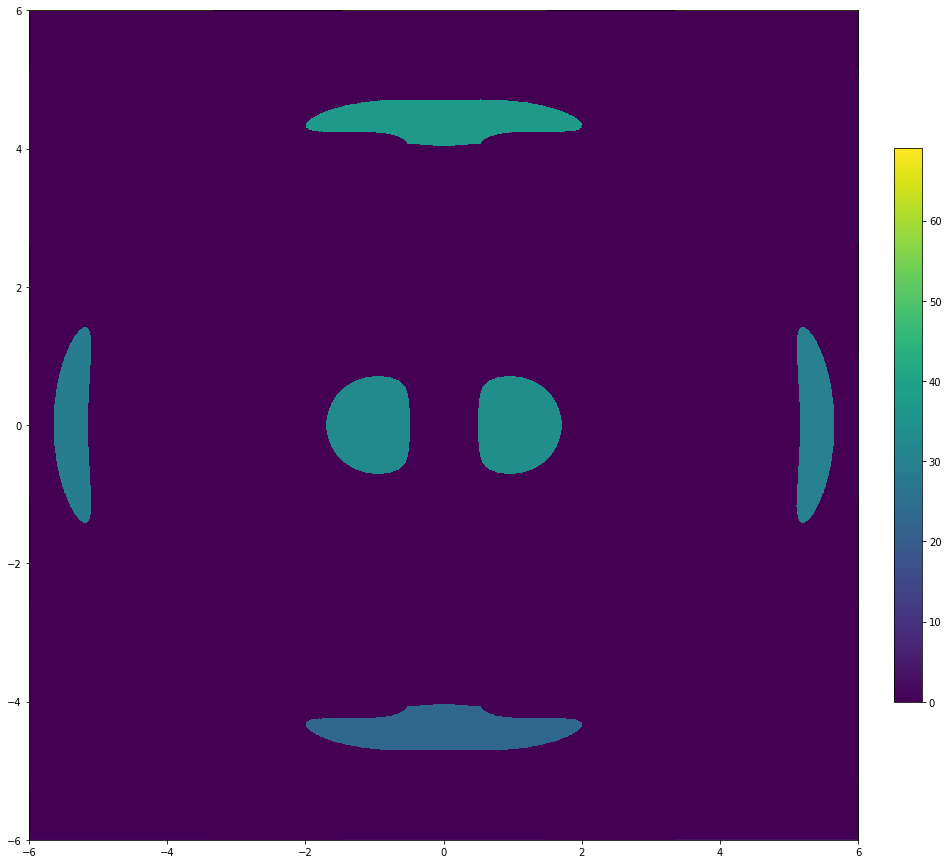

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69]
23: G,rc,xc,yc = -3.3774e-08,0.8543,-5.36,3.825e-05
33: G,rc,xc,yc = -4.8e-08,1.084,0.0001324,4.429
34: G,rc,xc,yc = -4.7949e-08,1.083,0.0001823,-4.428
36: G,rc,xc,yc = 0.94433,0.9506,-1.038,1.867e-16
37: G,rc,xc,yc = 0.94433,0.9506,1.038,1.961e-16
50: G,rc,xc,yc = -3.3774e-08,0.8543,5.36,-2.18e-05


In [7]:
x0,y0 = -1.0,0.0
x1,y1 =  1.0,0.0

Gamma0 = 1.0
Gamma1 = 1.0

Gamma = 1.0
rc = 1.0
rc2 = rc**2

u = np.zeros(Xv.shape)
v = np.zeros(Yv.shape)

r2 = (Xv-x0)**2 + (Yv-y0)**2
Fr = (Gamma0/(2*np.pi*r2))*(1-np.exp(-r2/rc2))
u += (- (Yv-y0) * Fr)
v +=    (Xv-x0) * Fr

r2 = (Xv-x1)**2 + (Yv-y1)**2
Fr = (Gamma1/(2*np.pi*r2))*(1-np.exp(-r2/rc2))
u += (- (Yv-y1) * Fr)
v +=    (Xv-x1) * Fr

##############################################

ux = d_dx(u); uy = d_dy(u)
vx = d_dx(v); vy = d_dy(v)

detDu = ux*vy - uy*vx
lamb  = detDu 

##############################################

ux = d_dx(u); uy = d_dy(u)
vx = d_dx(v); vy = d_dy(v)

uxxx = d_dx(d_dx(d_dx(u)))
uxxy = d_dx(d_dx(d_dy(u)))
uxyy = d_dx(d_dy(d_dy(u)))
uyyy = d_dy(d_dy(d_dy(u)))

vxxx = d_dx(d_dx(d_dx(v)))
vxxy = d_dx(d_dx(d_dy(v)))
vxyy = d_dx(d_dy(d_dy(v)))
vyyy = d_dy(d_dy(d_dy(v)))

omega = vx-uy
omega_tilde = uxxy + uyyy - vxxx - vxyy
lamb_tilde  = (uyyy-vxyy)*(uxxy - vxxx) - (uxyy-vxxy)**2

##############################################

heave = np.zeros(omega_tilde.shape)
heave[omega*omega_tilde > 0.0] = 1.0

lamb_tilde[lamb_tilde<0.0] = 0.0
lamb_tilde = lamb_tilde * heave

fig = plt.figure(figsize=(18,18*((Ymax-Ymin)/(Xmax-Xmin))))

skip = 40
plt.quiver(Xv[::skip,::skip],Yv[::skip,::skip],u[::skip,::skip],v[::skip,::skip],scale = 7.5)

cbar = plt.imshow(lamb_tilde.T,extent=(Xmin,Xmax,Ymin,Ymax),
                               origin='lower', cmap='seismic',aspect='equal',
                               vmin = -np.max(lamb_tilde),vmax = np.max(lamb_tilde))
fig.colorbar(cbar,fraction=0.031, pad=0.04)

###############################################

blobs = measure.label(lamb_tilde.T>0.0,background=0)

fig = plt.figure(figsize=(16,16))

cbar = plt.imshow(blobs,extent=(Xmin,Xmax,Ymin,Ymax),origin='lower')
fig.colorbar(cbar,fraction=0.031, pad=0.04)

plt.show()

###############################################

blobs = measure.label(lamb_tilde>0.0,background=0)
print(np.unique(blobs))

for k in np.unique(blobs)[1:]:
    chi = np.zeros(lamb.shape)
    chi[blobs == k] = 1
    
    ###############################################
    # scipy.integrate.simps(y, x=None, dx=1, axis=- 1, even='avg')
    if np.mean(chi) < 1.e-3:
        continue
    
    area     = sp.integrate.simps(sp.integrate.simps(chi,X,axis = 0),Y,axis=0)
    intOmega = sp.integrate.simps(sp.integrate.simps(chi*omega,X,axis = 0),Y,axis=0)
    Xw       = sp.integrate.simps(sp.integrate.simps(chi*omega*Xv,X,axis = 0),Y,axis=0)
    Yw       = sp.integrate.simps(sp.integrate.simps(chi*omega*Yv,X,axis = 0),Y,axis=0)
    
    rc = np.sqrt(area/np.pi)*np.sqrt(2.)
    G  = 2.541494083*intOmega
    xc = Xw/intOmega
    yc = Yw/intOmega
    
    print("{4}: G,rc,xc,yc = {0:.5g},{1:.4g},{2:.4g},{3:.4g}".format(G,rc,xc,yc,k))

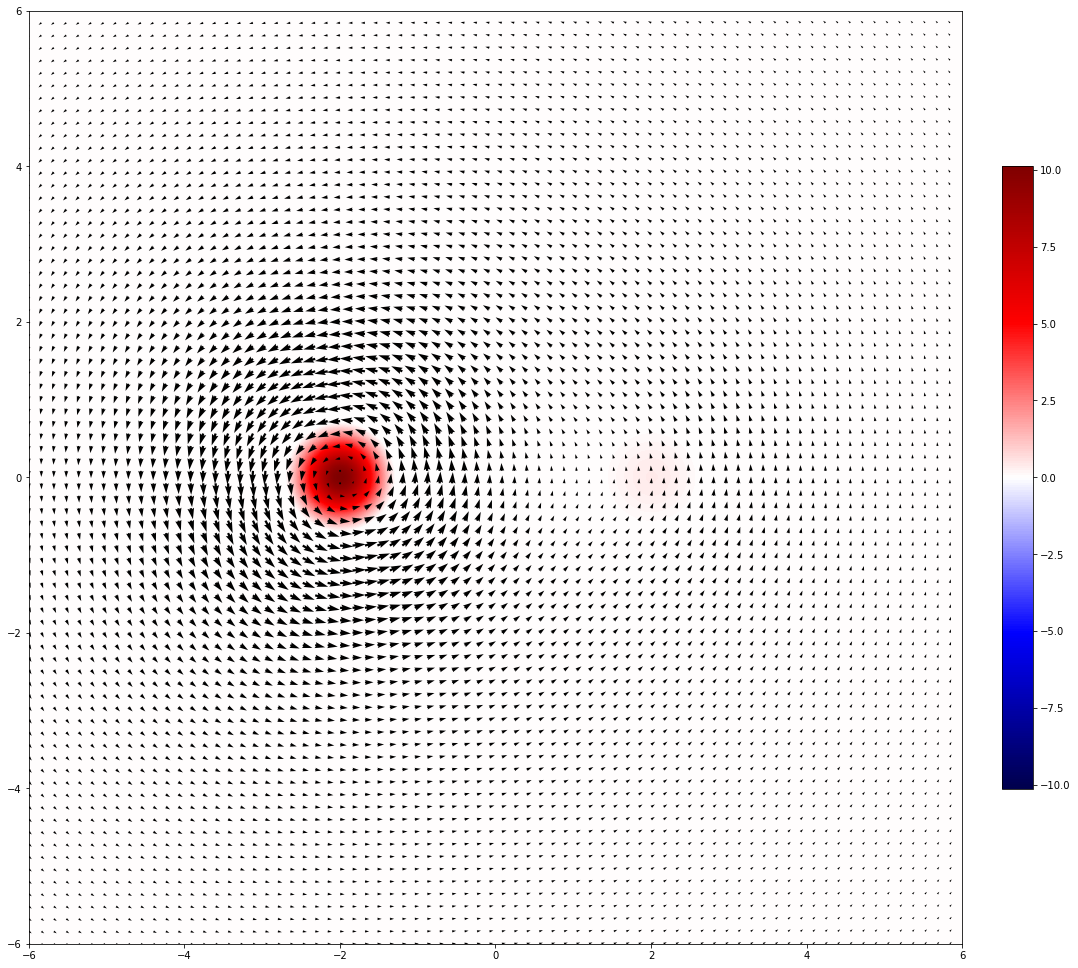

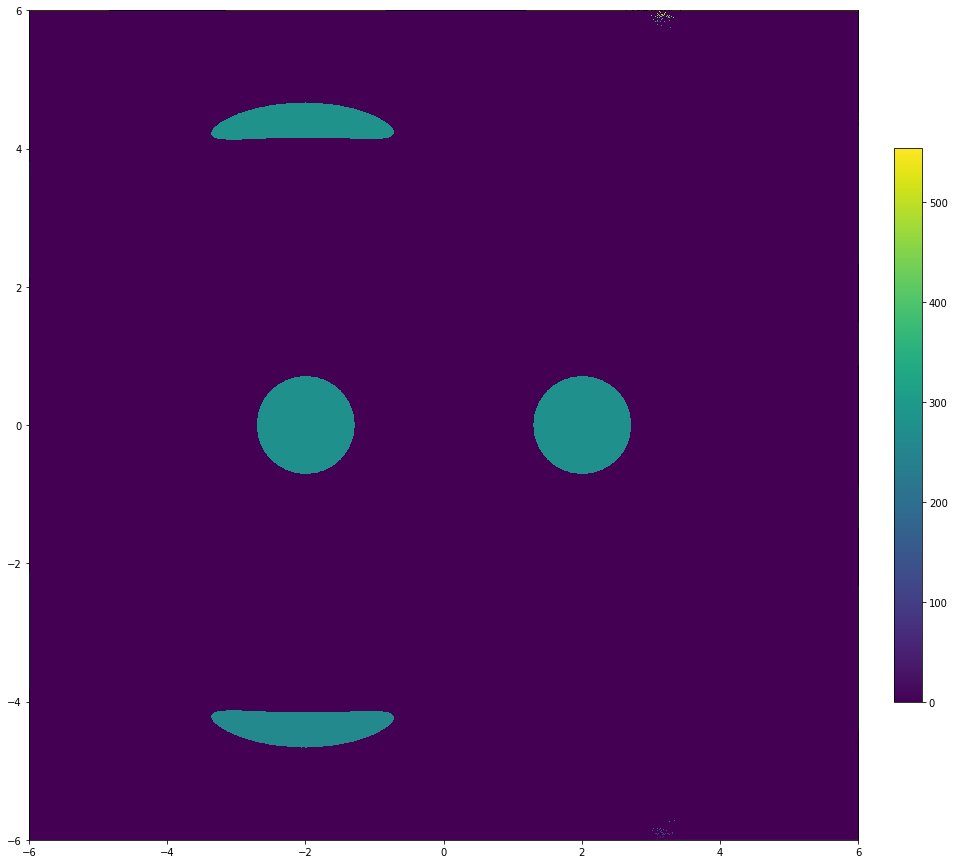

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [8]:
x0,y0 = -2.0,0.0
x1,y1 =  2.0,0.0

Gamma0 = 5.0
Gamma1 = 1.0

Gamma = 1.0
rc = 1.0
rc2 = rc**2

u = np.zeros(Xv.shape)
v = np.zeros(Yv.shape)

r2 = (Xv-x0)**2 + (Yv-y0)**2
Fr = (Gamma0/(2*np.pi*r2))*(1-np.exp(-r2/rc2))
u += (- (Yv-y0) * Fr)
v +=    (Xv-x0) * Fr

r2 = (Xv-x1)**2 + (Yv-y1)**2
Fr = (Gamma1/(2*np.pi*r2))*(1-np.exp(-r2/rc2))
u += (- (Yv-y1) * Fr)
v +=    (Xv-x1) * Fr

##############################################

ux = d_dx(u); uy = d_dy(u)
vx = d_dx(v); vy = d_dy(v)

detDu = ux*vy - uy*vx
lamb  = detDu 

##############################################

ux = d_dx(u); uy = d_dy(u)
vx = d_dx(v); vy = d_dy(v)

uxxx = d_dx(d_dx(d_dx(u)))
uxxy = d_dx(d_dx(d_dy(u)))
uxyy = d_dx(d_dy(d_dy(u)))
uyyy = d_dy(d_dy(d_dy(u)))

vxxx = d_dx(d_dx(d_dx(v)))
vxxy = d_dx(d_dx(d_dy(v)))
vxyy = d_dx(d_dy(d_dy(v)))
vyyy = d_dy(d_dy(d_dy(v)))

omega = vx-uy
omega_tilde = uxxy + uyyy - vxxx - vxyy
lamb_tilde  = (uyyy-vxyy)*(uxxy - vxxx) - (uxyy-vxxy)**2

##############################################

heave = np.zeros(omega_tilde.shape)
heave[omega*omega_tilde > 0.0] = 1.0

lamb_tilde[lamb_tilde<0.0] = 0.0
lamb_tilde = lamb_tilde * heave

fig = plt.figure(figsize=(18,18*((Ymax-Ymin)/(Xmax-Xmin))))

skip = 40
plt.quiver(Xv[::skip,::skip],Yv[::skip,::skip],u[::skip,::skip],v[::skip,::skip],scale = 35)

cbar = plt.imshow(lamb_tilde.T,extent=(Xmin,Xmax,Ymin,Ymax),
                               origin='lower', cmap='seismic',aspect='equal',
                               vmin = -np.max(lamb_tilde),vmax = np.max(lamb_tilde))
fig.colorbar(cbar,fraction=0.031, pad=0.04)

###############################################

blobs = measure.label(lamb_tilde.T>0.0,background=0)

fig = plt.figure(figsize=(16,16))

cbar = plt.imshow(blobs,extent=(Xmin,Xmax,Ymin,Ymax),origin='lower')
fig.colorbar(cbar,fraction=0.031, pad=0.04)

plt.show()

###############################################

blobs = measure.label(lamb_tilde>0.0,background=0)
print(np.unique(blobs))

for k in np.unique(blobs)[1:]:
    chi = np.zeros(lamb.shape)
    chi[blobs == k] = 1
    
    ###############################################
    # scipy.integrate.simps(y, x=None, dx=1, axis=- 1, even='avg')
    if np.mean(chi) < 1.e-3:
        continue
    
    area     = sp.integrate.simps(sp.integrate.simps(chi,X,axis = 0),Y,axis=0)
    intOmega = sp.integrate.simps(sp.integrate.simps(chi*omega,X,axis = 0),Y,axis=0)
    Xw       = sp.integrate.simps(sp.integrate.simps(chi*omega*Xv,X,axis = 0),Y,axis=0)
    Yw       = sp.integrate.simps(sp.integrate.simps(chi*omega*Yv,X,axis = 0),Y,axis=0)
    
    rc = np.sqrt(area/np.pi)*np.sqrt(2.)
    G  = 2.541494083*intOmega
    xc = Xw/intOmega
    yc = Yw/intOmega
    
    print("{4}: G,rc,xc,yc = {0:.5g},{1:.4g},{2:.4g},{3:.4g}".format(G,rc,xc,yc,k))

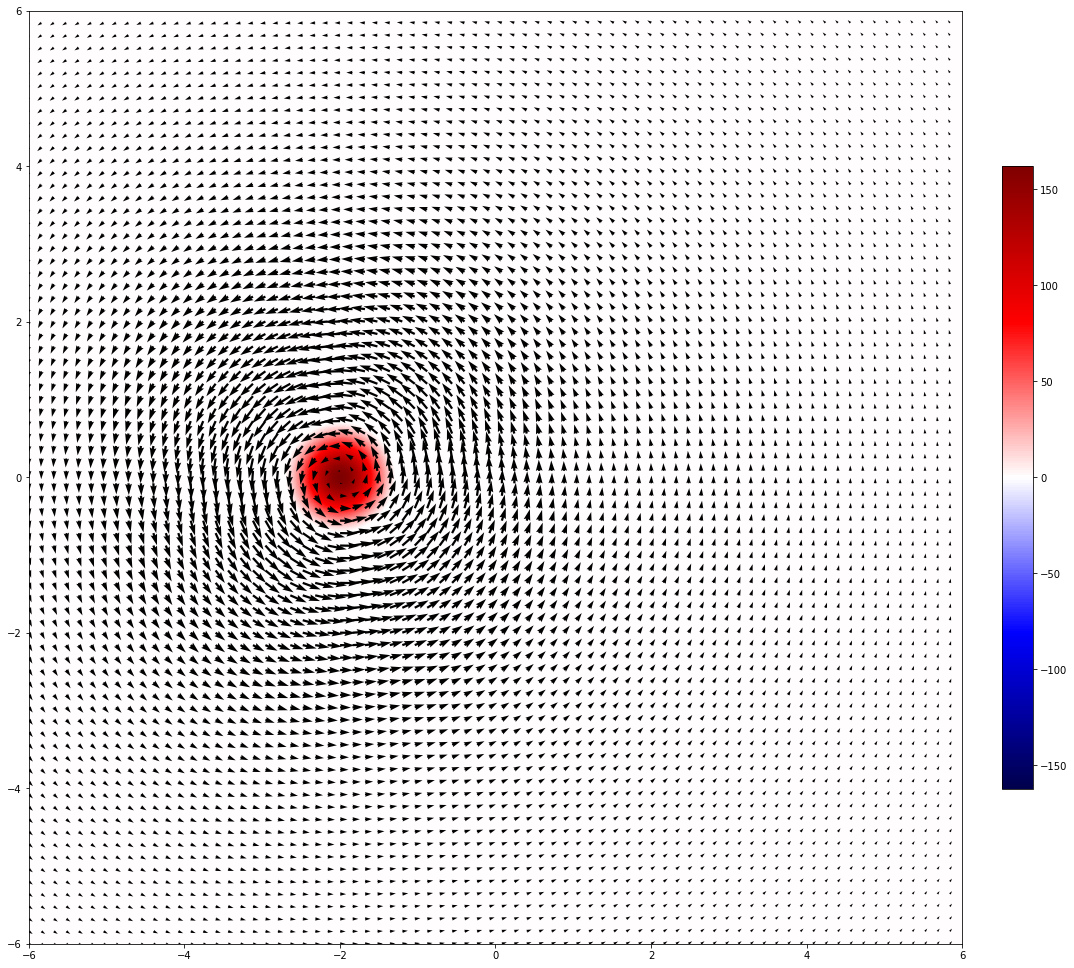

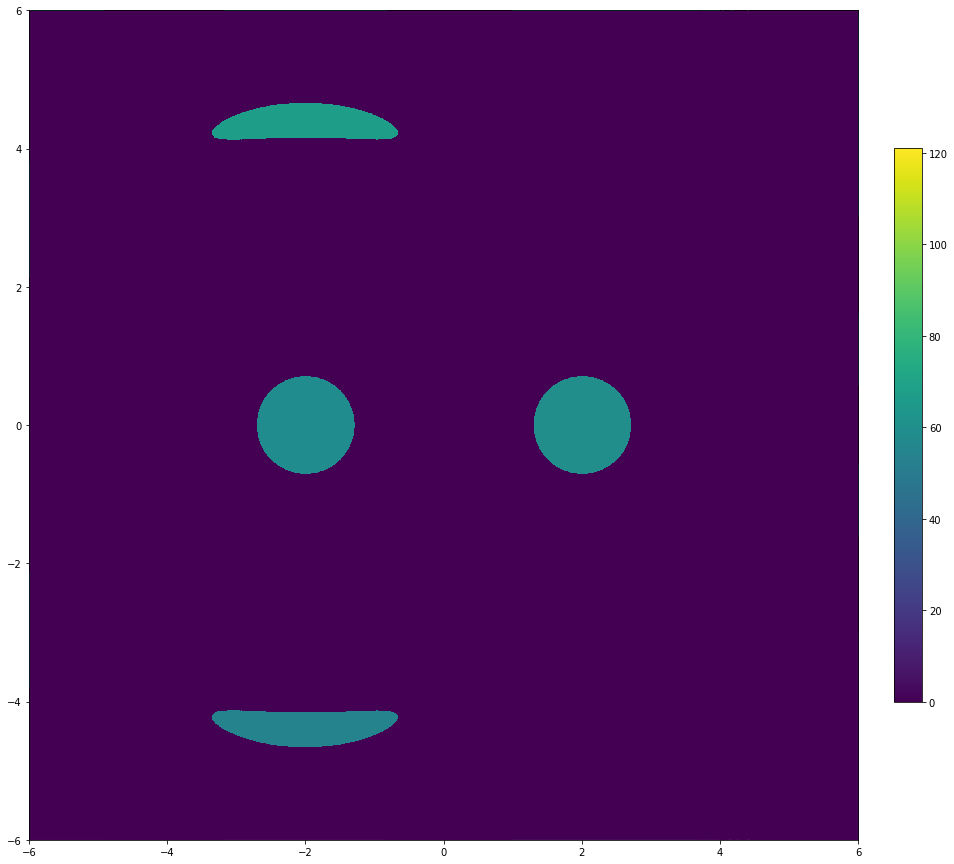

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121]
12: G,rc,xc,yc = -4.9909e-07,0.8348,-2.009,-4.38
13: G,rc,xc,yc = -4.9919e-07,0.8349,-2.009,4.38
14: G,rc,xc,yc = 20.001,1,-2,1.693e-16
19: G,rc,xc,yc = 0.99863,0.9991,2.001,1.589e-16


In [9]:
x0,y0 = -2.0,0.0
x1,y1 =  2.0,0.0

Gamma0 = 20.0
Gamma1 = 1.0

Gamma = 1.0
rc = 1.0
rc2 = rc**2

u = np.zeros(Xv.shape)
v = np.zeros(Yv.shape)

r2 = (Xv-x0)**2 + (Yv-y0)**2
Fr = (Gamma0/(2*np.pi*r2))*(1-np.exp(-r2/rc2))
u += (- (Yv-y0) * Fr)
v +=    (Xv-x0) * Fr

r2 = (Xv-x1)**2 + (Yv-y1)**2
Fr = (Gamma1/(2*np.pi*r2))*(1-np.exp(-r2/rc2))
u += (- (Yv-y1) * Fr)
v +=    (Xv-x1) * Fr

##############################################

ux = d_dx(u); uy = d_dy(u)
vx = d_dx(v); vy = d_dy(v)

detDu = ux*vy - uy*vx
lamb  = detDu 

##############################################

ux = d_dx(u); uy = d_dy(u)
vx = d_dx(v); vy = d_dy(v)

uxxx = d_dx(d_dx(d_dx(u)))
uxxy = d_dx(d_dx(d_dy(u)))
uxyy = d_dx(d_dy(d_dy(u)))
uyyy = d_dy(d_dy(d_dy(u)))

vxxx = d_dx(d_dx(d_dx(v)))
vxxy = d_dx(d_dx(d_dy(v)))
vxyy = d_dx(d_dy(d_dy(v)))
vyyy = d_dy(d_dy(d_dy(v)))

omega = vx-uy
omega_tilde = uxxy + uyyy - vxxx - vxyy
lamb_tilde  = (uyyy-vxyy)*(uxxy - vxxx) - (uxyy-vxxy)**2

##############################################

heave = np.zeros(omega_tilde.shape)
heave[omega*omega_tilde > 0.0] = 1.0

lamb_tilde[lamb_tilde<0.0] = 0.0
lamb_tilde = lamb_tilde * heave

fig = plt.figure(figsize=(18,18*((Ymax-Ymin)/(Xmax-Xmin))))

skip = 40
plt.quiver(Xv[::skip,::skip],Yv[::skip,::skip],u[::skip,::skip],v[::skip,::skip],scale = 95)

cbar = plt.imshow(lamb_tilde.T,extent=(Xmin,Xmax,Ymin,Ymax),
                               origin='lower', cmap='seismic',aspect='equal',
                               vmin = -np.max(lamb_tilde),vmax = np.max(lamb_tilde))
fig.colorbar(cbar,fraction=0.031, pad=0.04)

###############################################

blobs = measure.label(lamb_tilde.T>0.0,background=0)

fig = plt.figure(figsize=(16,16))

cbar = plt.imshow(blobs,extent=(Xmin,Xmax,Ymin,Ymax),origin='lower')
fig.colorbar(cbar,fraction=0.031, pad=0.04)

plt.show()

###############################################

blobs = measure.label(lamb_tilde>0.0,background=0)
print(np.unique(blobs))

for k in np.unique(blobs)[1:]:
    chi = np.zeros(lamb.shape)
    chi[blobs == k] = 1
    
    ###############################################
    # scipy.integrate.simps(y, x=None, dx=1, axis=- 1, even='avg')
    if np.mean(chi) < 1.e-3:
        continue
    
    area     = sp.integrate.simps(sp.integrate.simps(chi,X,axis = 0),Y,axis=0)
    intOmega = sp.integrate.simps(sp.integrate.simps(chi*omega,X,axis = 0),Y,axis=0)
    Xw       = sp.integrate.simps(sp.integrate.simps(chi*omega*Xv,X,axis = 0),Y,axis=0)
    Yw       = sp.integrate.simps(sp.integrate.simps(chi*omega*Yv,X,axis = 0),Y,axis=0)
    
    rc = np.sqrt(area/np.pi)*np.sqrt(2.)
    G  = 2.541494083*intOmega
    xc = Xw/intOmega
    yc = Yw/intOmega
    
    print("{4}: G,rc,xc,yc = {0:.5g},{1:.4g},{2:.4g},{3:.4g}".format(G,rc,xc,yc,k))

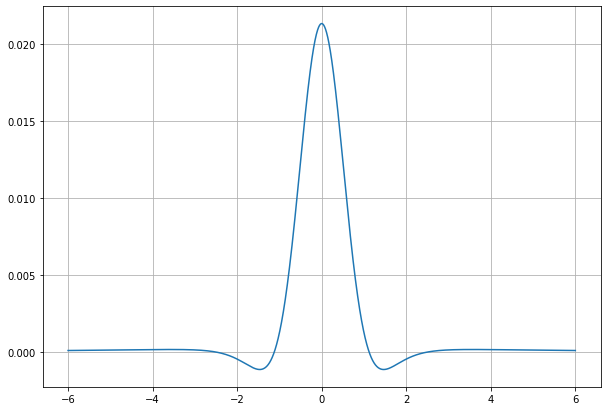

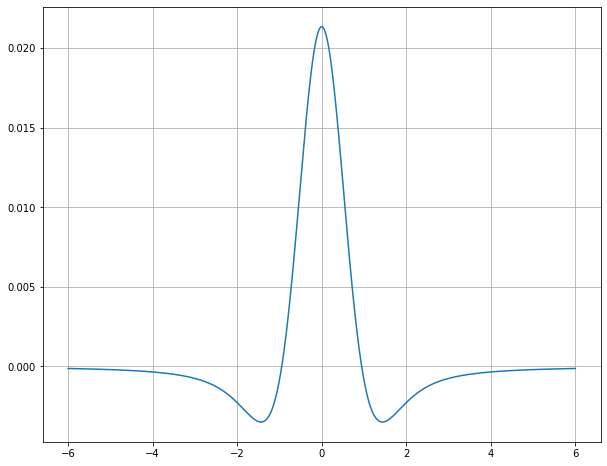

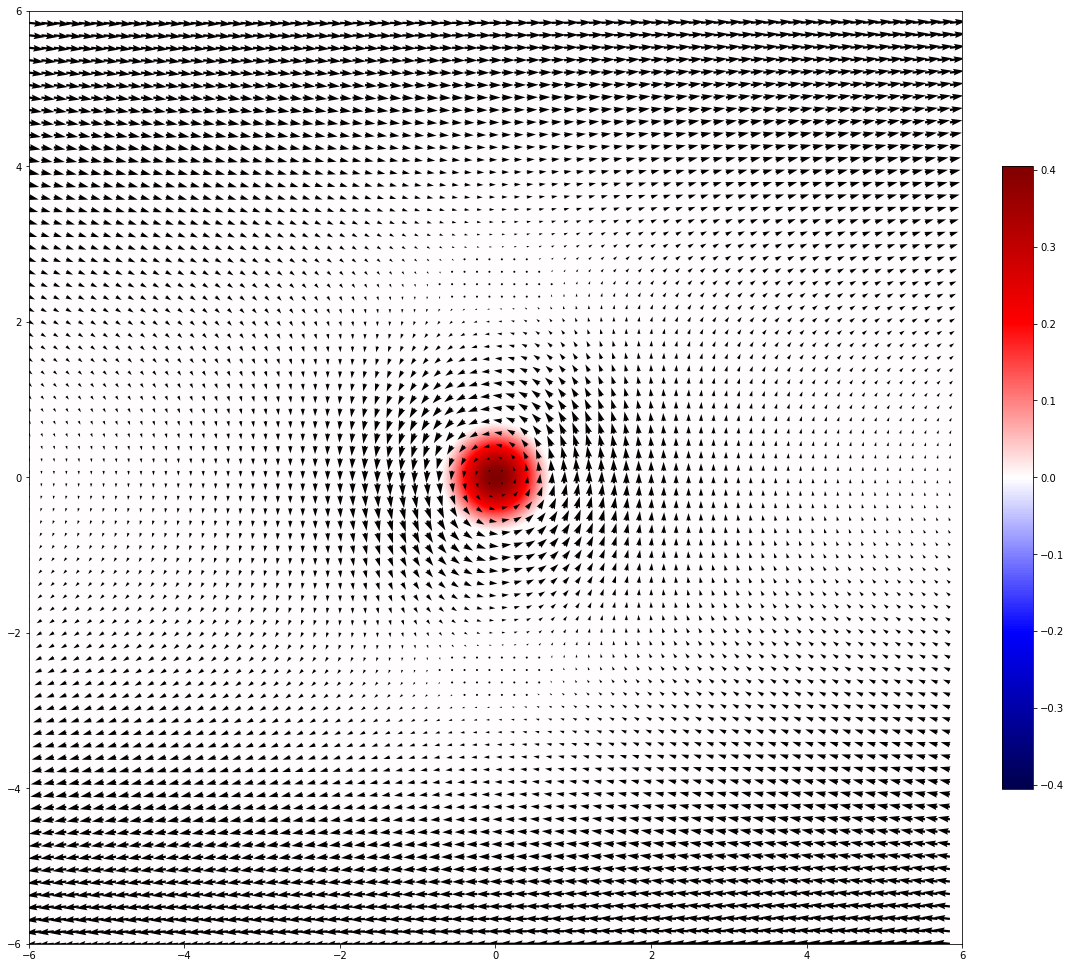

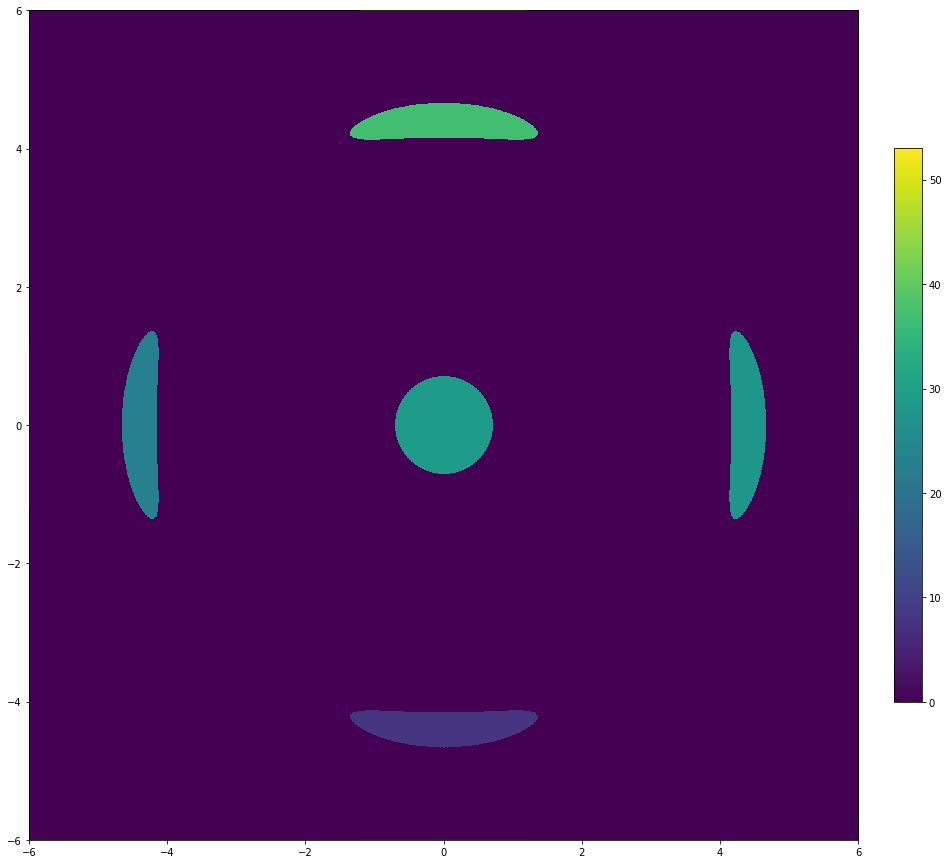

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53]
13: G,rc,xc,yc = -0.070027,0.8376,-4.36,4.36e-06
24: G,rc,xc,yc = -0.070045,0.8377,3.623e-05,4.36
25: G,rc,xc,yc = -0.07,0.8375,0.0001309,-4.36
29: G,rc,xc,yc = 0.90018,1,1.87e-16,1.861e-16
40: G,rc,xc,yc = -0.070064,0.8379,4.36,0.0001364


In [10]:
x0 = 0.0; y0 = 0.0

Gamma = 1.0
rc = 1.0
rc2 = rc**2

u = np.zeros(Xv.shape)
v = np.zeros(Yv.shape)

r2 = (Xv-x0)**2 + (Yv-y0)**2
Fr  = (Gamma/(2*np.pi*r2))*(1-np.exp(-r2/rc2))
u  += - (Yv-y0) * Fr
v  +=   (Xv-x0) * Fr

obar =  0.05
u   +=  0.5*obar*Yv

##############################################

ux = d_dx(u); uy = d_dy(u)
vx = d_dx(v); vy = d_dy(v)

detDu = ux*vy - uy*vx
lamb  = detDu 

##############################################

ux = d_dx(u); uy = d_dy(u)
vx = d_dx(v); vy = d_dy(v)

uxxx = d_dx(d_dx(d_dx(u)))
uxxy = d_dx(d_dx(d_dy(u)))
uxyy = d_dx(d_dy(d_dy(u)))
uyyy = d_dy(d_dy(d_dy(u)))

vxxx = d_dx(d_dx(d_dx(v)))
vxxy = d_dx(d_dx(d_dy(v)))
vxyy = d_dx(d_dy(d_dy(v)))
vyyy = d_dy(d_dy(d_dy(v)))

omega = vx-uy
omega_tilde = uxxy + uyyy - vxxx - vxyy
lamb_tilde  = (uyyy-vxyy)*(uxxy - vxxx) - (uxyy-vxxy)**2

##############################################

fig = plt.figure(figsize = (10,7))
plt.plot(X,lamb[:,Height//2])
plt.grid()
plt.show()

##############################################

fig = plt.figure(figsize = (10,8))
plt.plot(Y,lamb[Width//2,:])
plt.grid()
plt.show()

##############################################

heave = np.zeros(omega_tilde.shape)
heave[omega*omega_tilde > 0.0] = 1.0

lamb_tilde[lamb_tilde<0.0] = 0.0
lamb_tilde = lamb_tilde * heave

fig = plt.figure(figsize=(18,18*((Ymax-Ymin)/(Xmax-Xmin))))

skip = 40
plt.quiver(Xv[::skip,::skip],Yv[::skip,::skip],u[::skip,::skip],v[::skip,::skip],scale = 7.5)

cbar = plt.imshow(lamb_tilde.T,extent=(Xmin,Xmax,Ymin,Ymax),
                               origin='lower', cmap='seismic',aspect='equal',
                               vmin = -np.max(lamb_tilde),vmax = np.max(lamb_tilde))
fig.colorbar(cbar,fraction=0.031, pad=0.04)

###############################################

blobs = measure.label(lamb_tilde.T>0.0,background=0)

fig = plt.figure(figsize=(16,16))

cbar = plt.imshow(blobs,extent=(Xmin,Xmax,Ymin,Ymax),origin='lower')
fig.colorbar(cbar,fraction=0.031, pad=0.04)

plt.show()

###############################################

blobs = measure.label(lamb_tilde>0.0,background=0)
print(np.unique(blobs))

for k in np.unique(blobs)[1:]:
    chi = np.zeros(lamb.shape)
    chi[blobs == k] = 1
    
    ###############################################
    # scipy.integrate.simps(y, x=None, dx=1, axis=- 1, even='avg')
    if np.mean(chi) < 1.e-3:
        continue
    
    area     = sp.integrate.simps(sp.integrate.simps(chi,X,axis = 0),Y,axis=0)
    intOmega = sp.integrate.simps(sp.integrate.simps(chi*omega,X,axis = 0),Y,axis=0)
    Xw       = sp.integrate.simps(sp.integrate.simps(chi*omega*Xv,X,axis = 0),Y,axis=0)
    Yw       = sp.integrate.simps(sp.integrate.simps(chi*omega*Yv,X,axis = 0),Y,axis=0)
    
    rc = np.sqrt(area/np.pi)*np.sqrt(2.)
    G  = 2.541494083*intOmega
    xc = Xw/intOmega
    yc = Yw/intOmega
    
    print("{4}: G,rc,xc,yc = {0:.5g},{1:.4g},{2:.4g},{3:.4g}".format(G,rc,xc,yc,k))

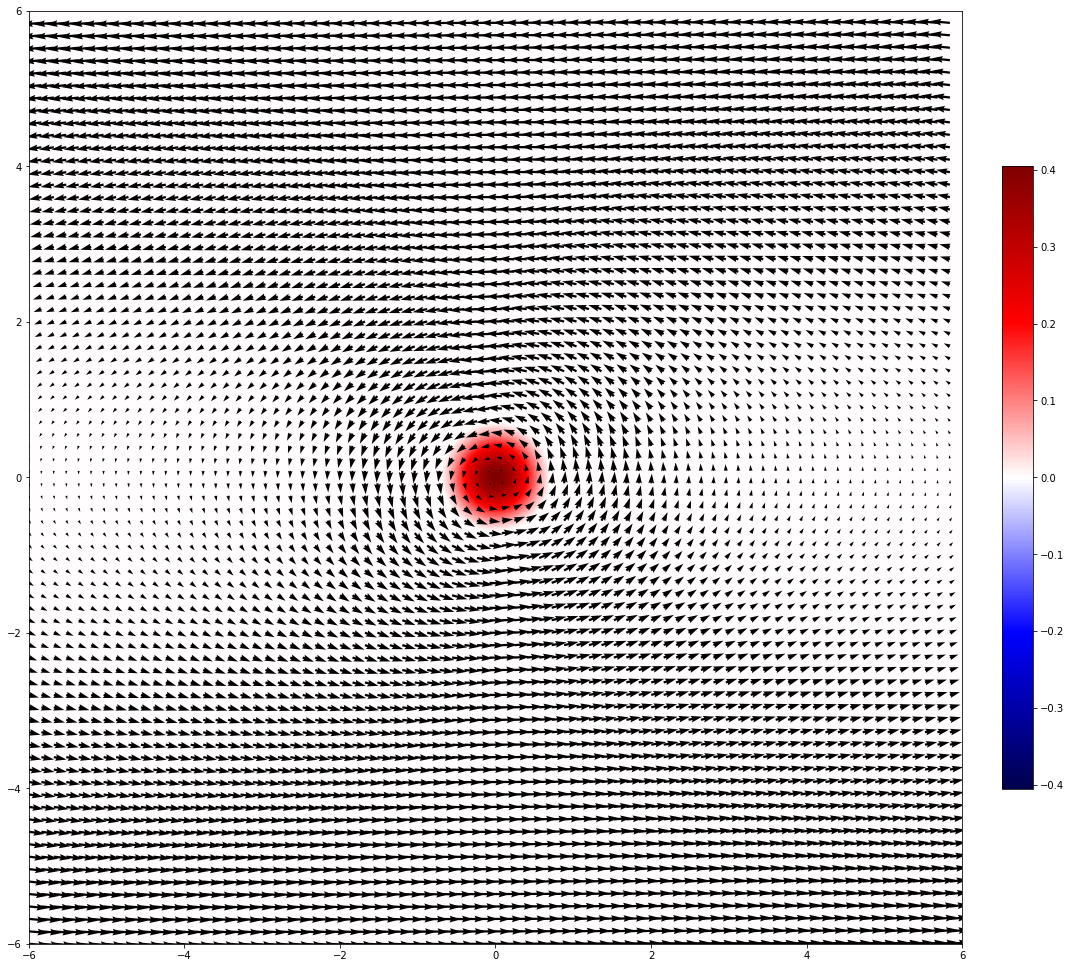

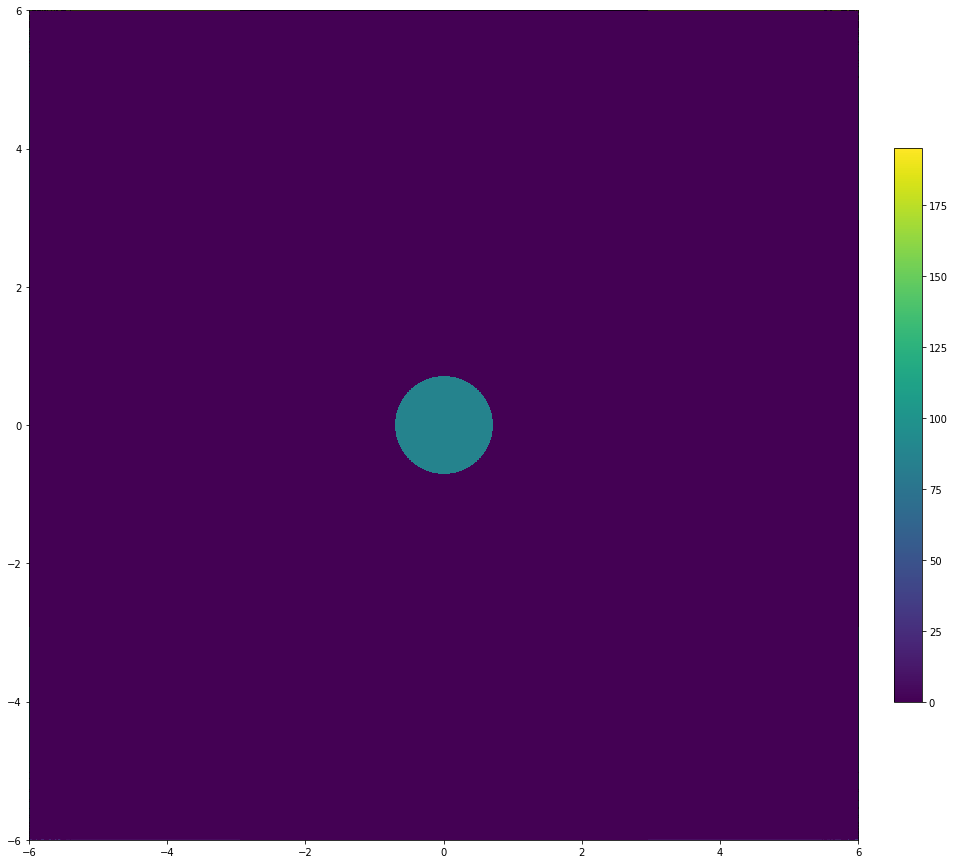

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195]
97: G,rc,xc,yc = 1.0998,1,2.046e-16,1.924e-16


In [11]:
x0 = 0.0; y0 = 0.0

Gamma = 1.0
rc = 1.0
rc2 = rc**2

u = np.zeros(Xv.shape)
v = np.zeros(Yv.shape)

r2 = (Xv-x0)**2 + (Yv-y0)**2
Fr  = (Gamma/(2*np.pi*r2))*(1-np.exp(-r2/rc2))
u  += - (Yv-y0) * Fr
v  +=   (Xv-x0) * Fr

obar =  -0.05
u   +=  0.5*obar*Yv

##############################################

ux = d_dx(u); uy = d_dy(u)
vx = d_dx(v); vy = d_dy(v)

detDu = ux*vy - uy*vx
lamb  = detDu 

##############################################

ux = d_dx(u); uy = d_dy(u)
vx = d_dx(v); vy = d_dy(v)

uxxx = d_dx(d_dx(d_dx(u)))
uxxy = d_dx(d_dx(d_dy(u)))
uxyy = d_dx(d_dy(d_dy(u)))
uyyy = d_dy(d_dy(d_dy(u)))

vxxx = d_dx(d_dx(d_dx(v)))
vxxy = d_dx(d_dx(d_dy(v)))
vxyy = d_dx(d_dy(d_dy(v)))
vyyy = d_dy(d_dy(d_dy(v)))

omega = vx-uy
omega_tilde = uxxy + uyyy - vxxx - vxyy
lamb_tilde  = (uyyy-vxyy)*(uxxy - vxxx) - (uxyy-vxxy)**2

##############################################

heave = np.zeros(omega_tilde.shape)
heave[omega*omega_tilde > 0.0] = 1.0

lamb_tilde[lamb_tilde<0.0] = 0.0
lamb_tilde = lamb_tilde * heave

fig = plt.figure(figsize=(18,18*((Ymax-Ymin)/(Xmax-Xmin))))

skip = 40
plt.quiver(Xv[::skip,::skip],Yv[::skip,::skip],u[::skip,::skip],v[::skip,::skip],scale = 7.5)

cbar = plt.imshow(lamb_tilde.T,extent=(Xmin,Xmax,Ymin,Ymax),
                               origin='lower', cmap='seismic',aspect='equal',
                               vmin = -np.max(lamb_tilde),vmax = np.max(lamb_tilde))
fig.colorbar(cbar,fraction=0.031, pad=0.04)

###############################################

blobs = measure.label(lamb_tilde.T>0.0,background=0)

fig = plt.figure(figsize=(16,16))

cbar = plt.imshow(blobs,extent=(Xmin,Xmax,Ymin,Ymax),origin='lower')
fig.colorbar(cbar,fraction=0.031, pad=0.04)

plt.show()

###############################################

blobs = measure.label(lamb_tilde>0.0,background=0)
print(np.unique(blobs))

for k in np.unique(blobs)[1:]:
    chi = np.zeros(lamb.shape)
    chi[blobs == k] = 1
    
    ###############################################
    # scipy.integrate.simps(y, x=None, dx=1, axis=- 1, even='avg')
    if np.mean(chi) < 1.e-3:
        continue
    
    area     = sp.integrate.simps(sp.integrate.simps(chi,X,axis = 0),Y,axis=0)
    intOmega = sp.integrate.simps(sp.integrate.simps(chi*omega,X,axis = 0),Y,axis=0)
    Xw       = sp.integrate.simps(sp.integrate.simps(chi*omega*Xv,X,axis = 0),Y,axis=0)
    Yw       = sp.integrate.simps(sp.integrate.simps(chi*omega*Yv,X,axis = 0),Y,axis=0)
    
    rc = np.sqrt(area/np.pi)*np.sqrt(2.)
    G  = 2.541494083*intOmega
    xc = Xw/intOmega
    yc = Yw/intOmega
    
    print("{4}: G,rc,xc,yc = {0:.5g},{1:.4g},{2:.4g},{3:.4g}".format(G,rc,xc,yc,k))

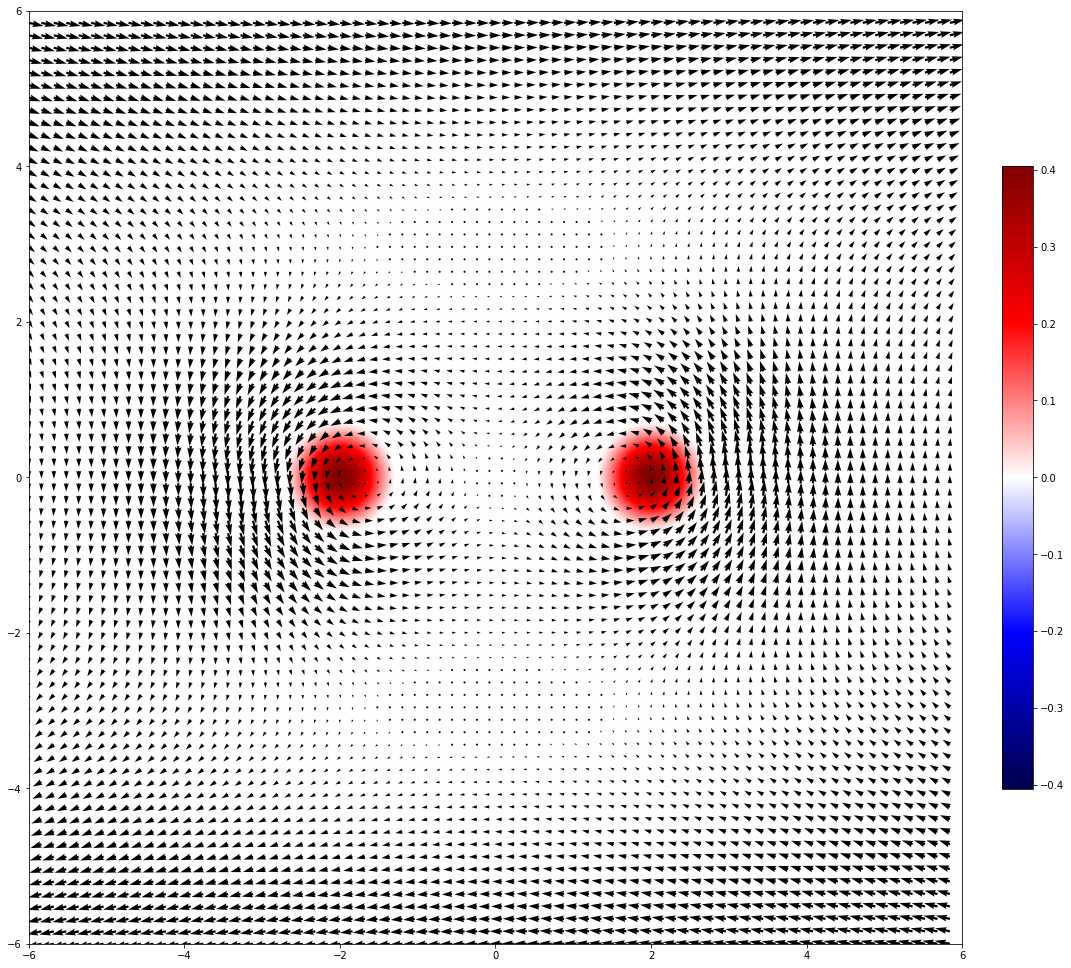

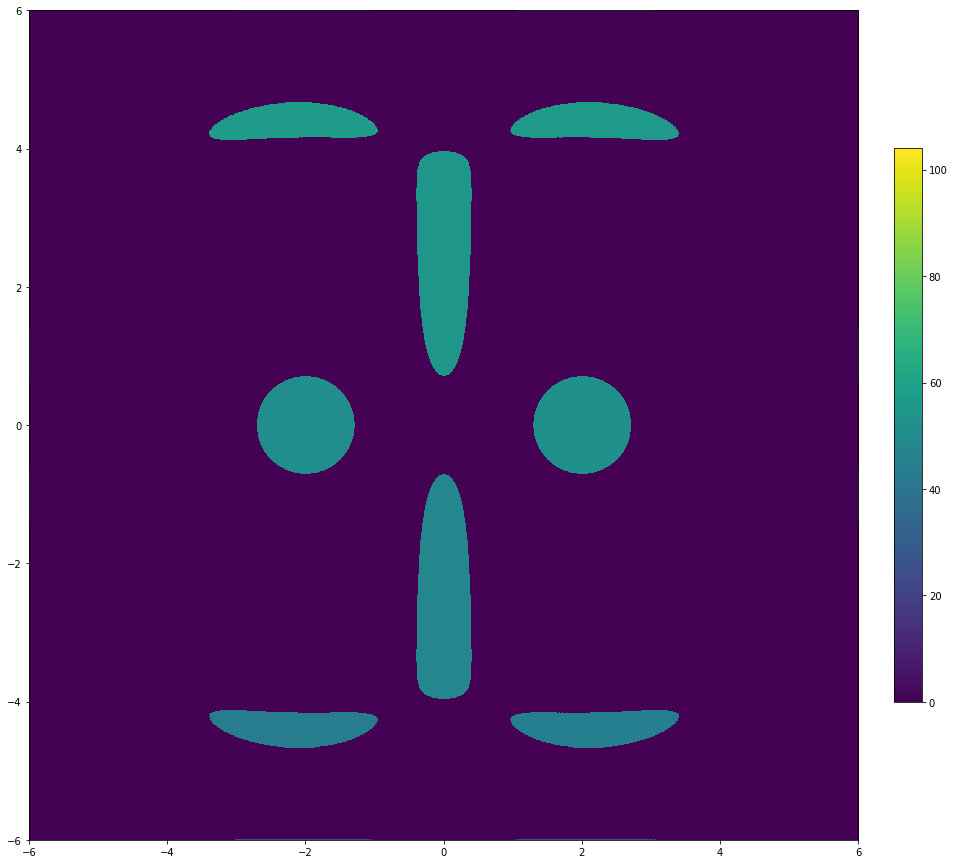

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104]
13: G,rc,xc,yc = -0.063387,0.7969,-2.174,-4.37
14: G,rc,xc,yc = -0.063363,0.7968,-2.174,4.37
15: G,rc,xc,yc = 0.9002,1,-2,1.861e-16
51: G,rc,xc,yc = -0.13518,1.182,-2.589e-06,-2.51
52: G,rc,xc,yc = -0.13518,1.182,-6.399e-06,2.51
86: G,rc,xc,yc = -0.063393,0.797,2.174,-4.37
87: G,rc,xc,yc = -0.063376,0.7969,2.174,4.37
91: G,rc,xc,yc = 0.9002,1,2,1.763e-16


In [12]:
x0,y0 = -2.0,0.0
x1,y1 =  2.0,0.0

Gamma0 = 1.0
Gamma1 = 1.0

Gamma = 1.0
rc = 1.0
rc2 = rc**2

u = np.zeros(Xv.shape)
v = np.zeros(Yv.shape)

r2 = (Xv-x0)**2 + (Yv-y0)**2
Fr = (Gamma0/(2*np.pi*r2))*(1-np.exp(-r2/rc2))
u += (- (Yv-y0) * Fr)
v +=    (Xv-x0) * Fr

r2 = (Xv-x1)**2 + (Yv-y1)**2
Fr = (Gamma1/(2*np.pi*r2))*(1-np.exp(-r2/rc2))
u += (- (Yv-y1) * Fr)
v +=    (Xv-x1) * Fr

obar =  0.05
u   +=  0.5*obar*Yv

##############################################

ux = d_dx(u); uy = d_dy(u)
vx = d_dx(v); vy = d_dy(v)

detDu = ux*vy - uy*vx
lamb  = detDu 

##############################################

ux = d_dx(u); uy = d_dy(u)
vx = d_dx(v); vy = d_dy(v)

uxxx = d_dx(d_dx(d_dx(u)))
uxxy = d_dx(d_dx(d_dy(u)))
uxyy = d_dx(d_dy(d_dy(u)))
uyyy = d_dy(d_dy(d_dy(u)))

vxxx = d_dx(d_dx(d_dx(v)))
vxxy = d_dx(d_dx(d_dy(v)))
vxyy = d_dx(d_dy(d_dy(v)))
vyyy = d_dy(d_dy(d_dy(v)))

omega = vx-uy
omega_tilde = uxxy + uyyy - vxxx - vxyy
lamb_tilde  = (uyyy-vxyy)*(uxxy - vxxx) - (uxyy-vxxy)**2

##############################################

heave = np.zeros(omega_tilde.shape)
heave[omega*omega_tilde > 0.0] = 1.0

lamb_tilde[lamb_tilde<0.0] = 0.0
lamb_tilde = lamb_tilde * heave

fig = plt.figure(figsize=(18,18*((Ymax-Ymin)/(Xmax-Xmin))))

skip = 40
plt.quiver(Xv[::skip,::skip],Yv[::skip,::skip],u[::skip,::skip],v[::skip,::skip],scale = 7.5)

cbar = plt.imshow(lamb_tilde.T,extent=(Xmin,Xmax,Ymin,Ymax),
                               origin='lower', cmap='seismic',aspect='equal',
                               vmin = -np.max(lamb_tilde),vmax = np.max(lamb_tilde))
fig.colorbar(cbar,fraction=0.031, pad=0.04)

###############################################

blobs = measure.label(lamb_tilde.T>0.0,background=0)

fig = plt.figure(figsize=(16,16))

cbar = plt.imshow(blobs,extent=(Xmin,Xmax,Ymin,Ymax),origin='lower')
fig.colorbar(cbar,fraction=0.031, pad=0.04)

plt.show()

###############################################

blobs = measure.label(lamb_tilde>0.0,background=0)
print(np.unique(blobs))

for k in np.unique(blobs)[1:]:
    chi = np.zeros(lamb.shape)
    chi[blobs == k] = 1
    
    ###############################################
    # scipy.integrate.simps(y, x=None, dx=1, axis=- 1, even='avg')
    if np.mean(chi) < 1.e-3:
        continue
    
    area     = sp.integrate.simps(sp.integrate.simps(chi,X,axis = 0),Y,axis=0)
    intOmega = sp.integrate.simps(sp.integrate.simps(chi*omega,X,axis = 0),Y,axis=0)
    Xw       = sp.integrate.simps(sp.integrate.simps(chi*omega*Xv,X,axis = 0),Y,axis=0)
    Yw       = sp.integrate.simps(sp.integrate.simps(chi*omega*Yv,X,axis = 0),Y,axis=0)
    
    rc = np.sqrt(area/np.pi)*np.sqrt(2.)
    G  = 2.541494083*intOmega
    xc = Xw/intOmega
    yc = Yw/intOmega
    
    print("{4}: G,rc,xc,yc = {0:.5g},{1:.4g},{2:.4g},{3:.4g}".format(G,rc,xc,yc,k))

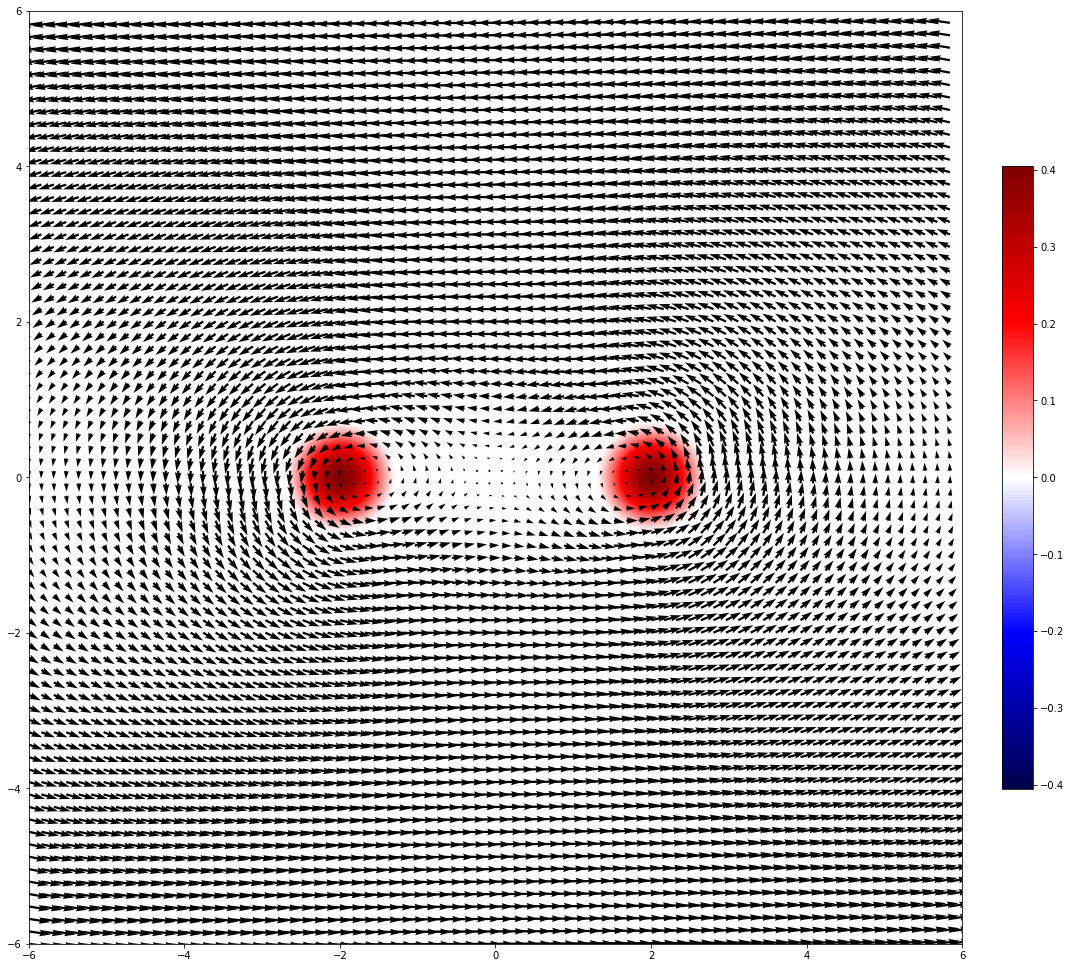

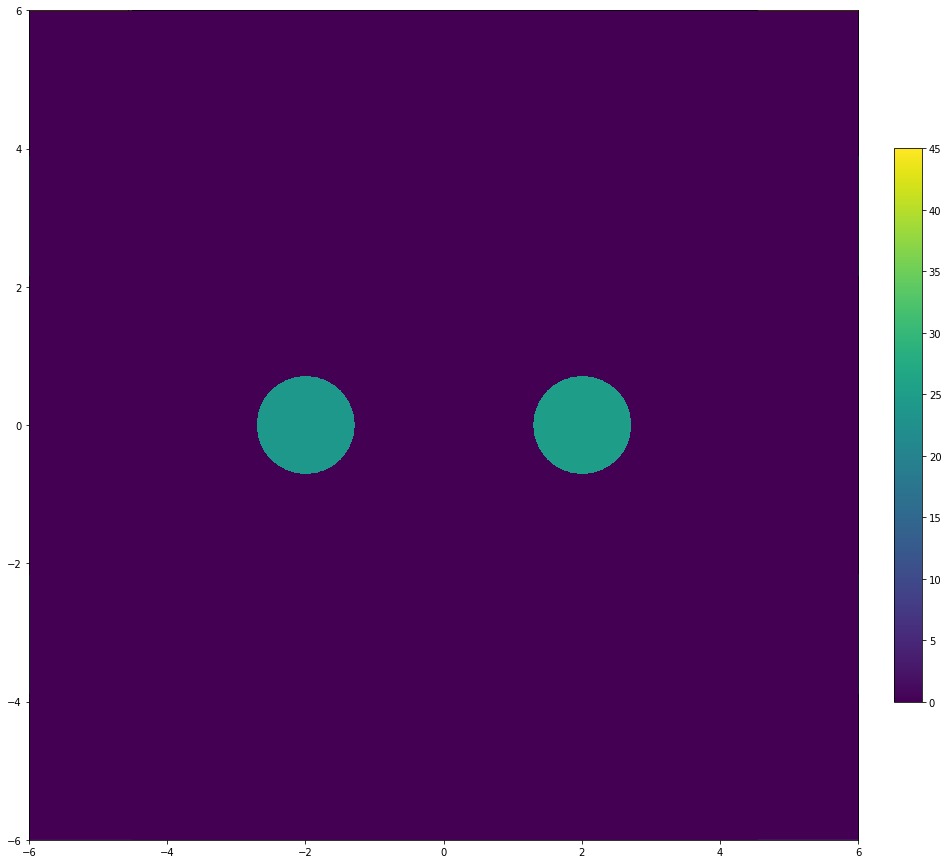

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
22: G,rc,xc,yc = 1.0998,1,-2,2.004e-16
23: G,rc,xc,yc = 1.0998,1,2,2.085e-16


In [13]:
x0,y0 = -2.0,0.0
x1,y1 =  2.0,0.0

Gamma0 = 1.0
Gamma1 = 1.0

Gamma = 1.0
rc = 1.0
rc2 = rc**2

u = np.zeros(Xv.shape)
v = np.zeros(Yv.shape)

r2 = (Xv-x0)**2 + (Yv-y0)**2
Fr = (Gamma0/(2*np.pi*r2))*(1-np.exp(-r2/rc2))
u += (- (Yv-y0) * Fr)
v +=    (Xv-x0) * Fr

r2 = (Xv-x1)**2 + (Yv-y1)**2
Fr = (Gamma1/(2*np.pi*r2))*(1-np.exp(-r2/rc2))
u += (- (Yv-y1) * Fr)
v +=    (Xv-x1) * Fr

obar =  -0.05
u   +=  0.5*obar*Yv

##############################################

ux = d_dx(u); uy = d_dy(u)
vx = d_dx(v); vy = d_dy(v)

detDu = ux*vy - uy*vx
lamb  = detDu 

##############################################

ux = d_dx(u); uy = d_dy(u)
vx = d_dx(v); vy = d_dy(v)

uxxx = d_dx(d_dx(d_dx(u)))
uxxy = d_dx(d_dx(d_dy(u)))
uxyy = d_dx(d_dy(d_dy(u)))
uyyy = d_dy(d_dy(d_dy(u)))

vxxx = d_dx(d_dx(d_dx(v)))
vxxy = d_dx(d_dx(d_dy(v)))
vxyy = d_dx(d_dy(d_dy(v)))
vyyy = d_dy(d_dy(d_dy(v)))

omega = vx-uy
omega_tilde = uxxy + uyyy - vxxx - vxyy
lamb_tilde  = (uyyy-vxyy)*(uxxy - vxxx) - (uxyy-vxxy)**2

##############################################

heave = np.zeros(omega_tilde.shape)
heave[omega*omega_tilde > 0.0] = 1.0

lamb_tilde[lamb_tilde<0.0] = 0.0
lamb_tilde = lamb_tilde * heave

fig = plt.figure(figsize=(18,18*((Ymax-Ymin)/(Xmax-Xmin))))

skip = 40
plt.quiver(Xv[::skip,::skip],Yv[::skip,::skip],u[::skip,::skip],v[::skip,::skip],scale = 7.5)

cbar = plt.imshow(lamb_tilde.T,extent=(Xmin,Xmax,Ymin,Ymax),
                               origin='lower', cmap='seismic',aspect='equal',
                               vmin = -np.max(lamb_tilde),vmax = np.max(lamb_tilde))
fig.colorbar(cbar,fraction=0.031, pad=0.04)

###############################################

blobs = measure.label(lamb_tilde.T>0.0,background=0)

fig = plt.figure(figsize=(16,16))

cbar = plt.imshow(blobs,extent=(Xmin,Xmax,Ymin,Ymax),origin='lower')
fig.colorbar(cbar,fraction=0.031, pad=0.04)

plt.show()

###############################################

blobs = measure.label(lamb_tilde>0.0,background=0)
print(np.unique(blobs))

for k in np.unique(blobs)[1:]:
    chi = np.zeros(lamb.shape)
    chi[blobs == k] = 1
    
    ###############################################
    # scipy.integrate.simps(y, x=None, dx=1, axis=- 1, even='avg')
    if np.mean(chi) < 1.e-3:
        continue
    
    area     = sp.integrate.simps(sp.integrate.simps(chi,X,axis = 0),Y,axis=0)
    intOmega = sp.integrate.simps(sp.integrate.simps(chi*omega,X,axis = 0),Y,axis=0)
    Xw       = sp.integrate.simps(sp.integrate.simps(chi*omega*Xv,X,axis = 0),Y,axis=0)
    Yw       = sp.integrate.simps(sp.integrate.simps(chi*omega*Yv,X,axis = 0),Y,axis=0)
    
    rc = np.sqrt(area/np.pi)*np.sqrt(2.)
    G  = 2.541494083*intOmega
    xc = Xw/intOmega
    yc = Yw/intOmega
    
    print("{4}: G,rc,xc,yc = {0:.5g},{1:.4g},{2:.4g},{3:.4g}".format(G,rc,xc,yc,k))